# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Uvoz biblioteka</p>

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import string
color = sns.color_palette()

%matplotlib inline

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
import pandas as pd
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

import seaborn as sns

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [179]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
sns.set_palette(["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"])

warnings.filterwarnings('ignore')

In [180]:
df_train = pd.read_csv("data/drugsComTrain_raw.csv", parse_dates=["date"])
df_test = pd.read_csv("data/drugsComTest_raw.csv", parse_dates=["date"])

In [181]:
df_train.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it mad

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Opis atributa i Vizuelizacija podataka</p>

* `drugName`: Naziv leka (Kategorički)
* `condition`: Naziv bolesti za koju je lek namenjen (Kategorički)
* `review`: Recenzija korisnika (Tekst)
* `rating`: Ocena korisnika od 1 do 10 (Numerički)
* `date`: Datum unosa recenzije (Datum)
* `usefulCount`: Broj korisnika kojima je značila recenzija (Numerički)

Tok je sledeći: Pacijent sa jedinstvenim ID-jem kupuje lek koji odgovara njegovom stanju i piše recenziju i ocenu za lek koji je kupio određenog datuma. Nakon toga, ako drugi korisnici smatraju da je recenzija korisna, mogu kliknuti na dugme "usefulCount", što će povećati vrednost te promenljive za 1.


In [182]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (161297, 7)
Test shape : (53766, 7)


In [183]:
#Konkatenacija trening i test skupa
df = pd.concat([df_train,df_test])

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Smanjenje skupa podataka</p>

Dodavanje nove kolone 'sentiment' koja označava da li je review pozitivan ili negativan.

In [184]:
df['sentiment'] = df["rating"].apply(lambda x: 1 if x > 5 else 0)

In [185]:
df.shape[0]

215063

In [186]:
df = df[df.groupby('drugName')['drugName'].transform('size') > 398]

In [187]:
df.shape[0]

111847

In [188]:
unique_drugs = df['drugName'].unique()
print(len(unique_drugs))

123


In [189]:
df_positive = df[df['sentiment'] == 1]
df_negative = df[df['sentiment'] == 0]

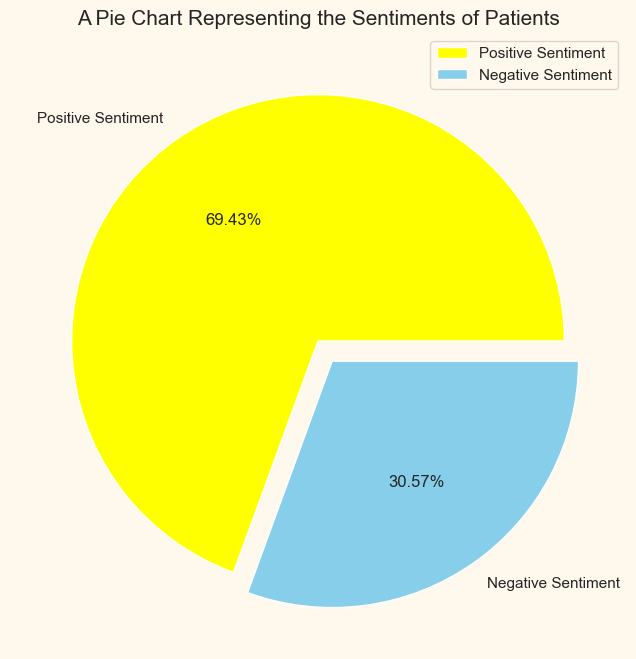

In [190]:
size = [len(df_positive), len(df_negative)]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 15)
plt.legend()
plt.show()

In [193]:
df.reset_index(inplace=True)

In [194]:
df.head()

index  uniqueID                            drugName  \
0      4     35696            Buprenorphine / naloxone   
1      6    165907                      Levonorgestrel   
2      7    102654                        Aripiprazole   
3      9     48928  Ethinyl estradiol / levonorgestrel   
4     10     29607                          Topiramate   

                 condition  \
0        Opiate Dependence   
1  Emergency Contraception   
2          Bipolar Disorde   
3            Birth Control   
4      Migraine Prevention   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  \
0                    "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     "He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant."   
2      "Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."   
3  "I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am 

In [195]:
print("Broj unikatnih vrednosti skupa podataka : " , len(set(df['uniqueID'].values)))
print("Ukupna veličina skupa podataka: " ,df.shape[0])

Broj unikatnih vrednosti skupa podataka :  111847
Ukupna veličina skupa podataka:  111847


Vidimo da se ove dve vrednosti poklapaju. Ovo ukazuje na to da su sve vrednosti iz skupa podataka unikatne, tj. da nema duplikata.

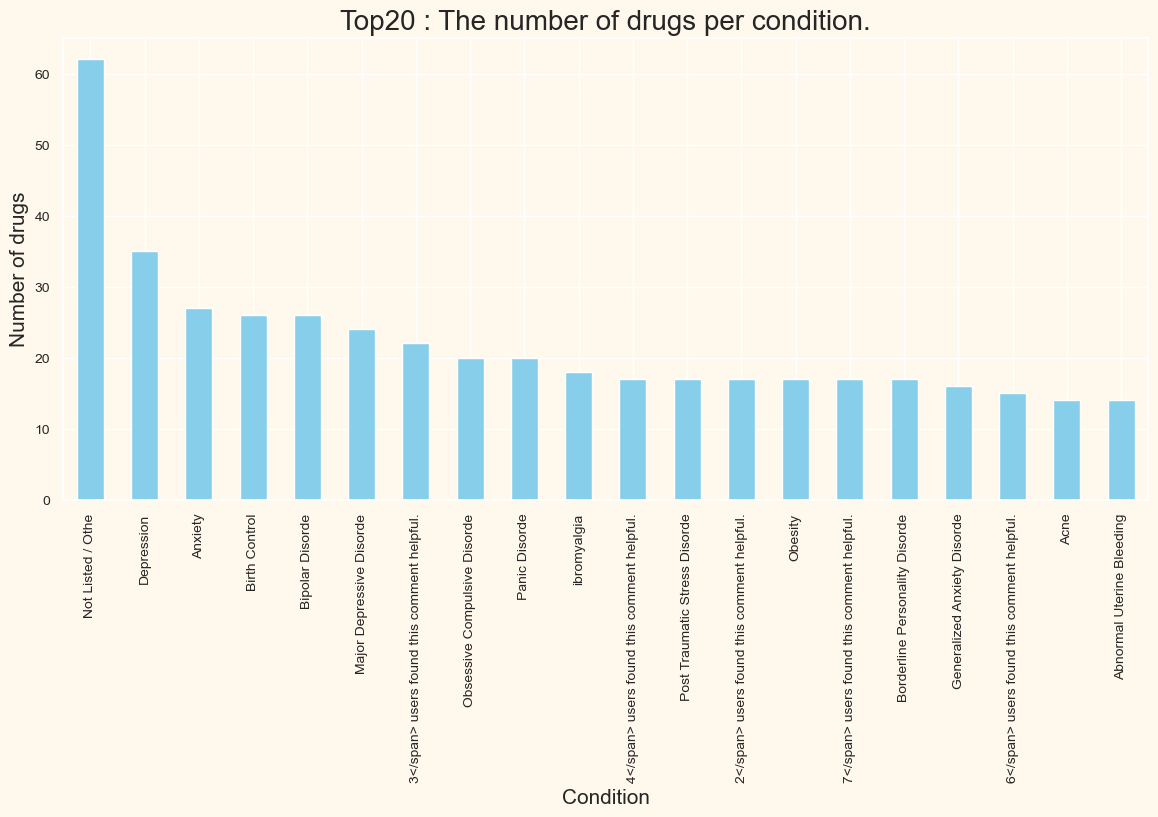

In [196]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10, color="skyblue")
plt.xlabel("Condition", fontsize = 15)
plt.ylabel("Number of drugs", fontsize = 15)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20);

In [197]:
len(df[df.condition == 'Anxiety'])

6580

S obzirom da postoji mnogo bolesti za koje postoji samo po jedan lek, kasnije ćemo ih najverovatnije izbaciti jer su irelevantne.

Sada možemo da pogledamo review

In [198]:
df_train['review'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [199]:
df_train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

Vidimo da postoje greške i javljaju se reči poput "didn&#039", "it&#039" i sl.

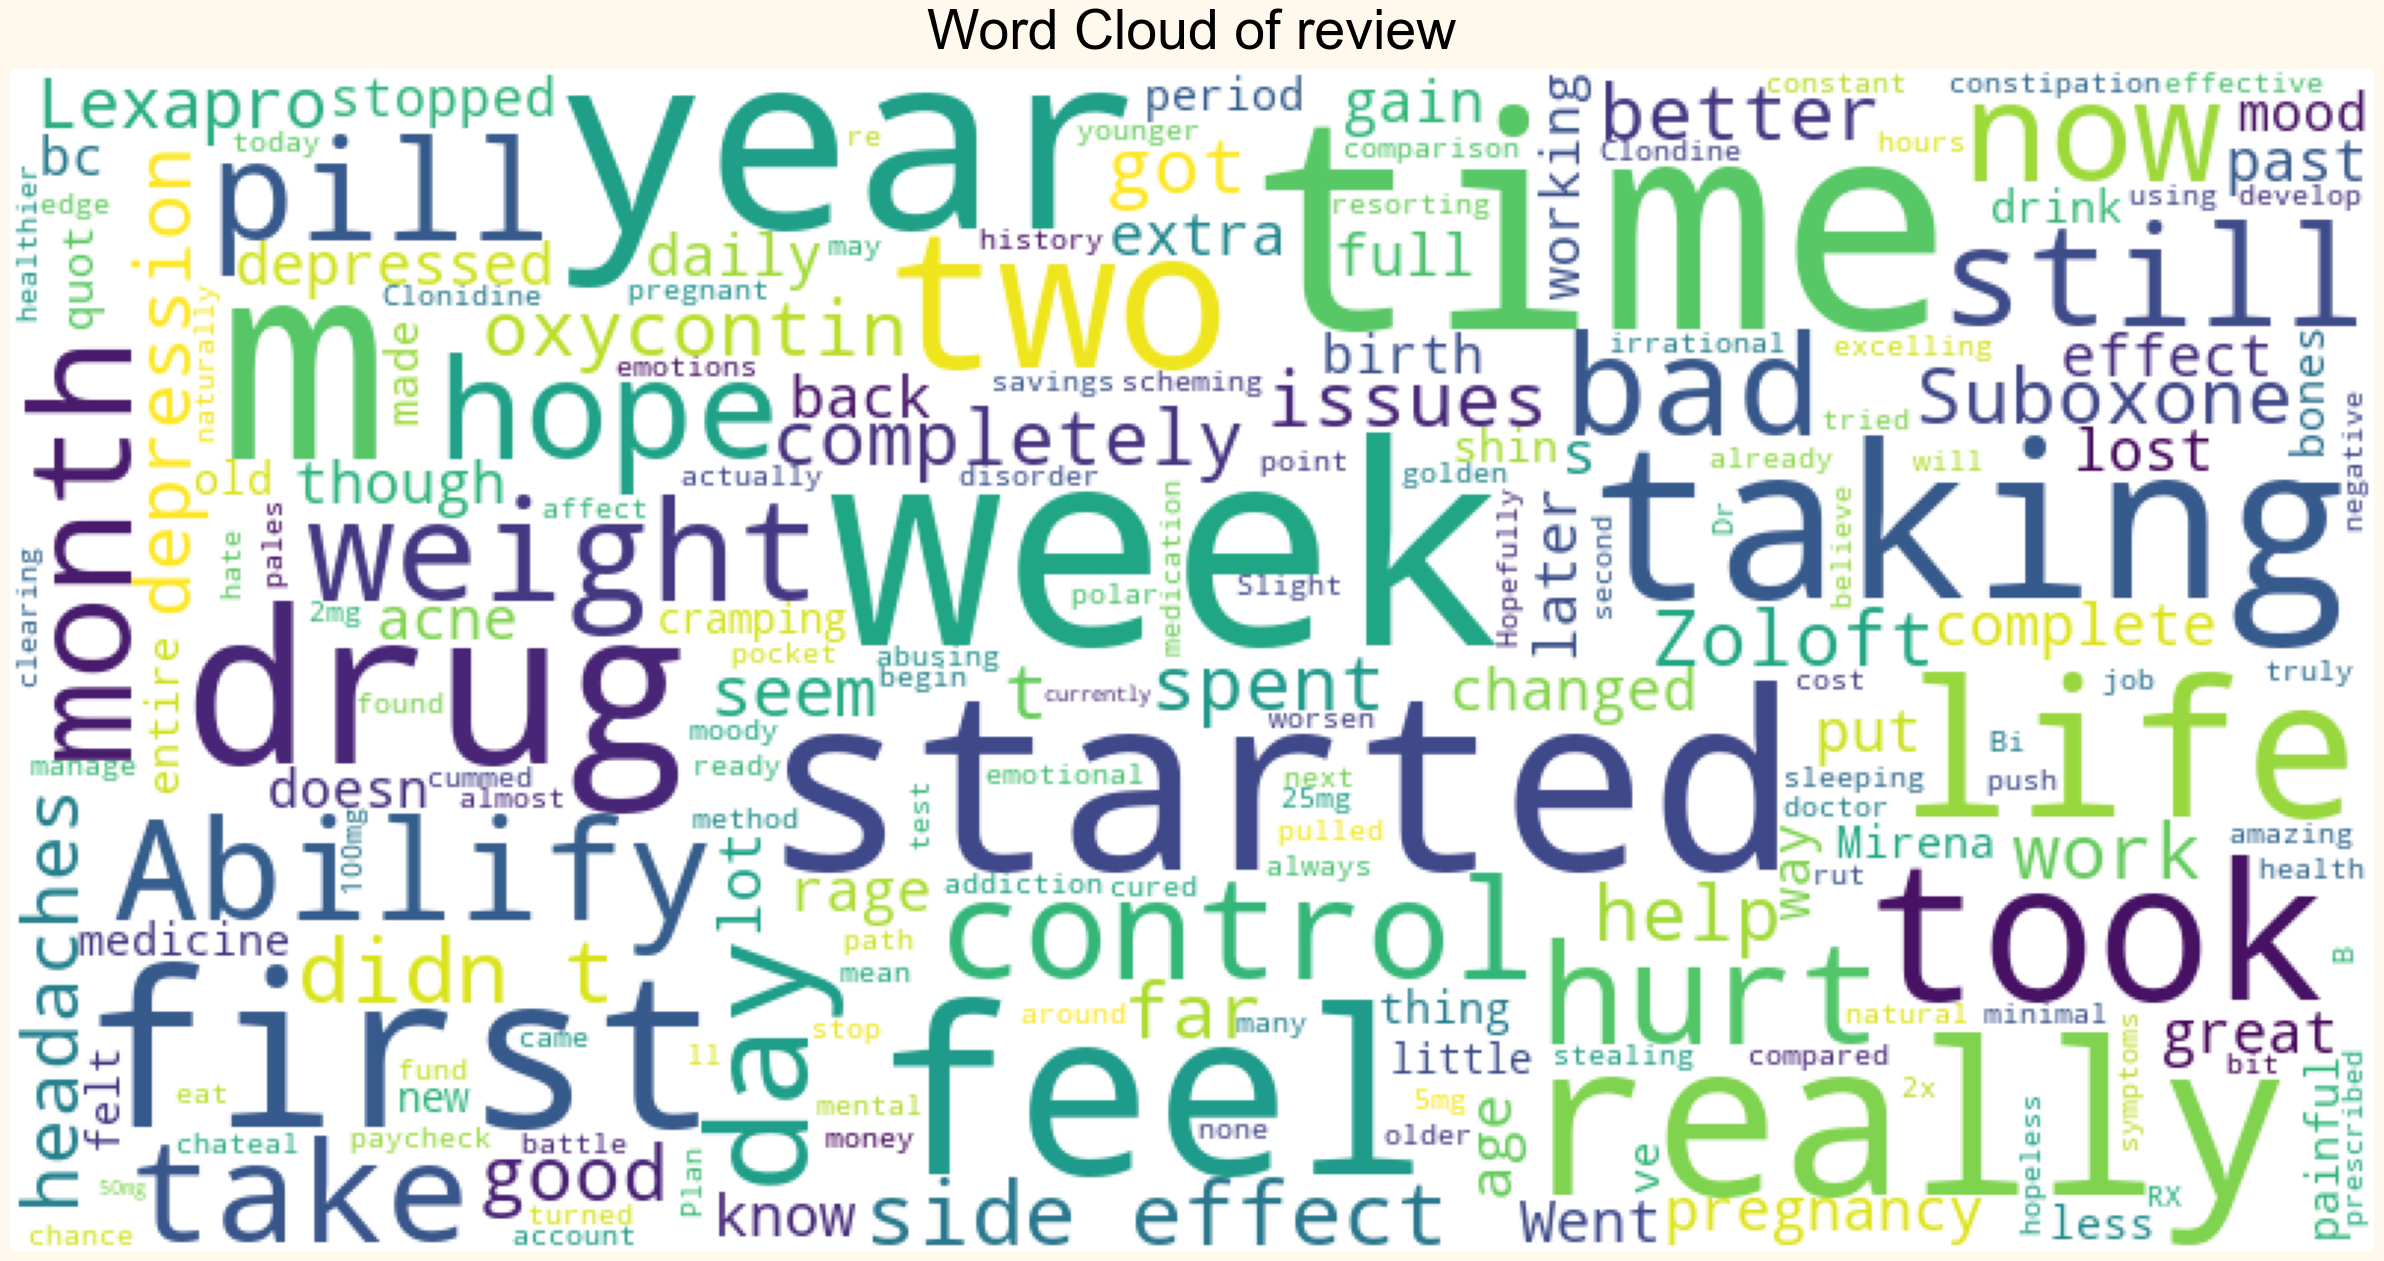

In [200]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["review"], title="Word Cloud of review")

U nastavku, sve lekove ocenjene ocenom koja je ispod 6 tretiramo kao negativno ocenjene, u suprotnom su pozitivne.

In [201]:
df_positive = df[df["rating"]>5]
df_negative = df[df["rating"]<6]

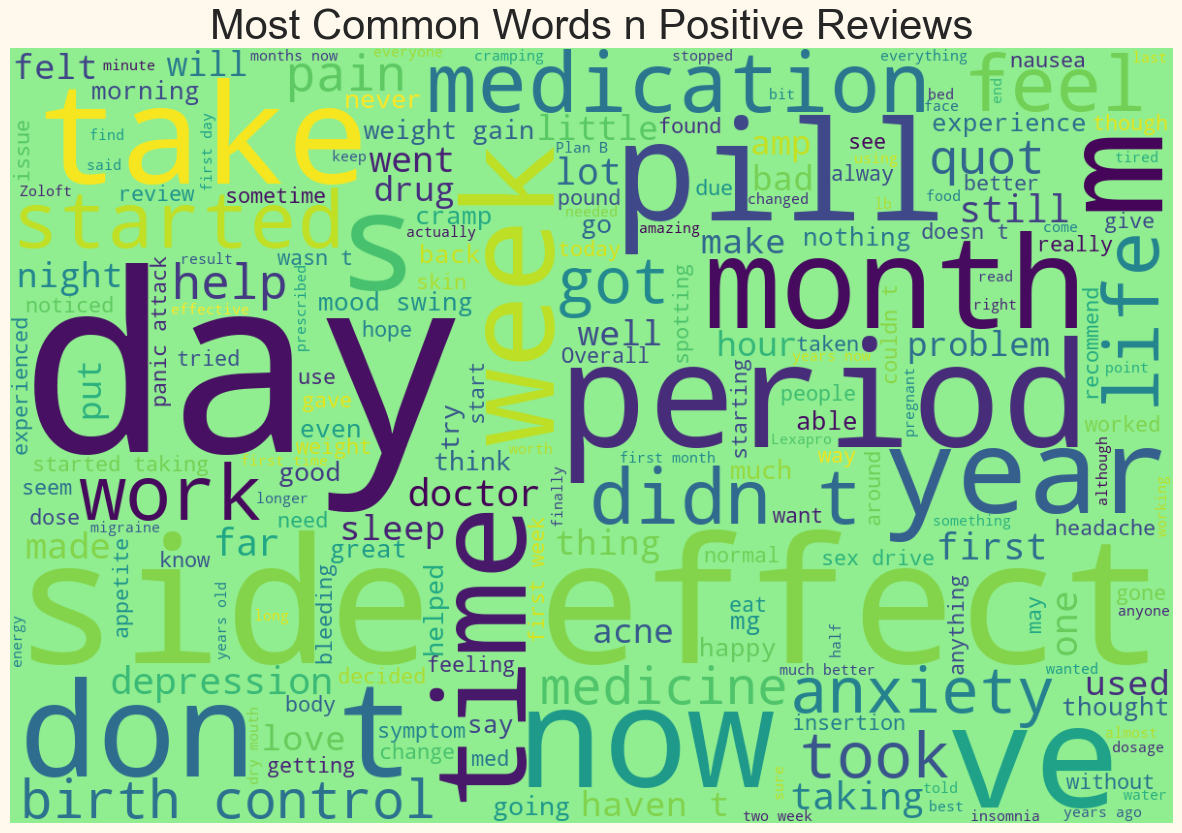

In [202]:
positive_sentiments = " ".join([text for text in df_positive['review']])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words n Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show();

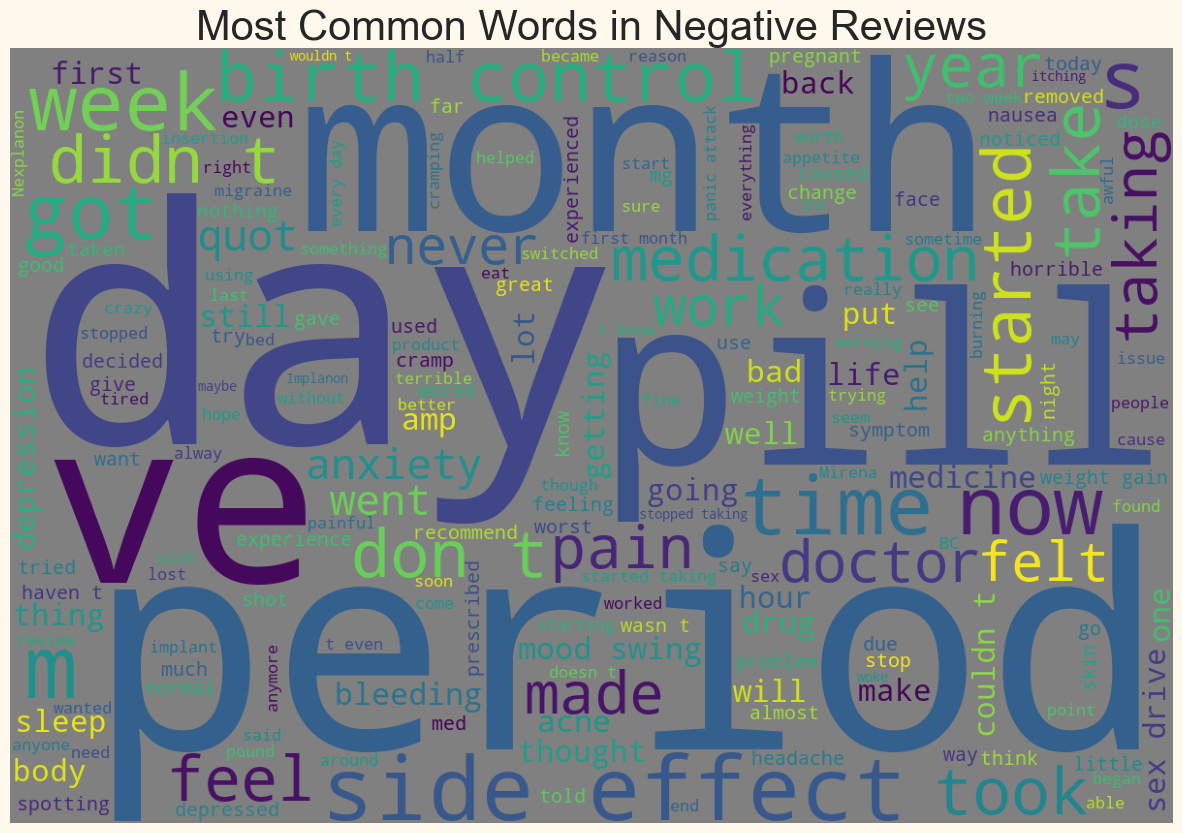

In [203]:
negative_sentiments = " ".join([text for text in df_negative['review']])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Kreiranje n-grama</p>

In [204]:
from collections import defaultdict
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        orientation='h',
        marker=dict(
            color=color,
            line=dict(
                color='rgba(58, 71, 80, 0.6)',
                width=1
            )
        ),
    )
    return trace

def draw_charts(n, ngram):
    freq_dict = defaultdict(int)
    for sent in df_negative["review"]:
        for word in generate_ngrams(sent, n):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace1 = horizontal_bar_chart(fd_sorted.head(50), 'rgba(255, 87, 51, 0.7)')

    freq_dict = defaultdict(int)
    for sent in df_positive["review"]:
        for word in generate_ngrams(sent, n):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace2 = horizontal_bar_chart(fd_sorted.head(50), 'rgba(0, 153, 255, 0.7)')

    fig = make_subplots(rows=1, cols=2, subplot_titles=[f"Frequent {ngram} of rating 1 to 5", 
                                                        f"Frequent {ngram} of rating 6 to 10"],
                        horizontal_spacing=0.15)

    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=1, col=2)

    fig.update_layout(
        height=600,
        width=1000,
        title=f"{ngram} Count Plots",
        xaxis=dict(title=f"{ngram} Count"),
        yaxis=dict(title=f"{ngram}"),
        paper_bgcolor='rgb(240, 240, 240)',
        plot_bgcolor='rgb(240, 240, 240)',
    )

    py.iplot(fig, filename='word-plots')

In [205]:
draw_charts(1, "words")

Vidimo da korišćenjem 1-grama ne bismo dobili ništa dobro jer se ne dobija nikakva informacija o pozitivnosti komentara. Vidimo iste reči i sa jedne i sa druge strane.

In [206]:
draw_charts(2, "Bigram")

Kao i malopre, i ovde vidimo istu situaciju. Sledeći korak je pokušavanje sa trigramima.

In [207]:
draw_charts(3, "Trigram")

Iz ovog 3-grama možemo primetiti razliku između pozitivnih i negativnih korpusa. Loše nuspojave, pilule za kontrolu rađanja, negativne nuspojave su korpusi koji klasifikuju pozitivno i negativno. Međutim, i za pozitivne i za negativne delovi može se smatrati da imaju nedostajuće delove koji menjaju kontekst, poput 'ne' ispred odgovarajućih konteksta.

In [208]:
draw_charts(4, "4-gram")

Kod 4-grama već vidimo ozbiljan napredak. Tako da ima smisla koristiti ovu vrstu ngrama prilikom dalje analize.

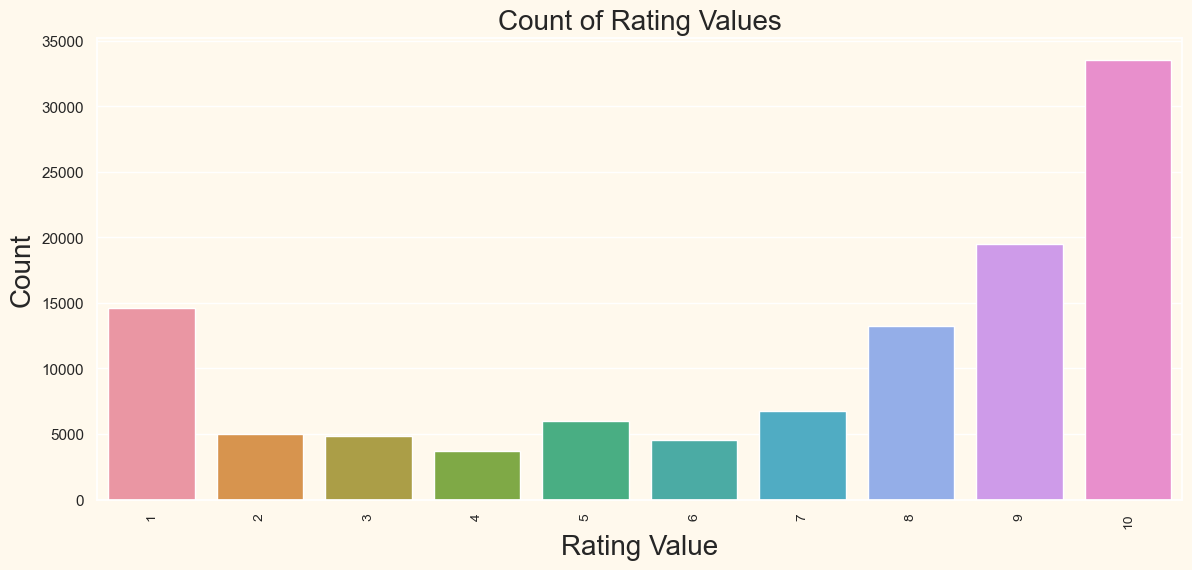

In [209]:
plt.figure(figsize=(14, 6))

# Računanje frekvence za svaki rejting i njihovo sortiranje
rating = df['rating'].value_counts().sort_values(ascending=False)

sns.barplot(x=rating.index, y=rating.values)

plt.xticks(rotation='vertical', fontsize=10)

plt.xlabel("Rating Value", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Count of Rating Values", fontsize=20)

plt.show()


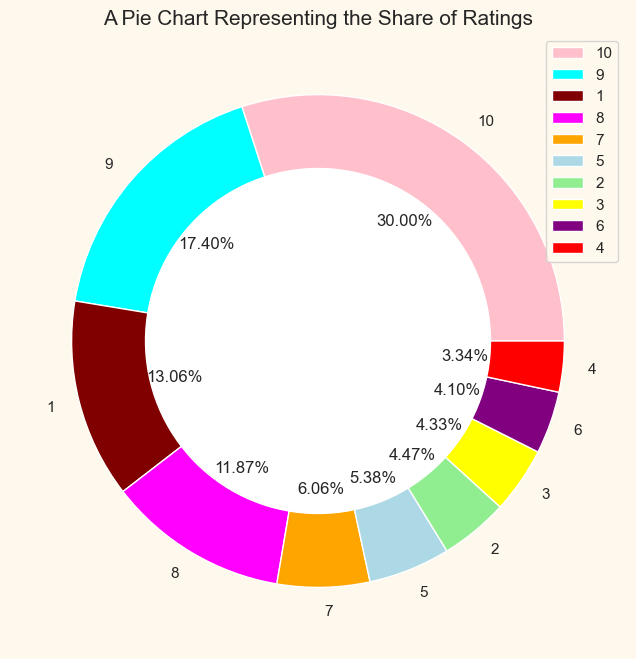

In [210]:
sizes = list(df['rating'].value_counts())

colors = ['pink', 'cyan', 'maroon', 'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow', 'purple', 'red']

labels = ["10", "9", "1", "8", "7", "5", "2", "3", "6", "4"]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(sizes, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 15)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

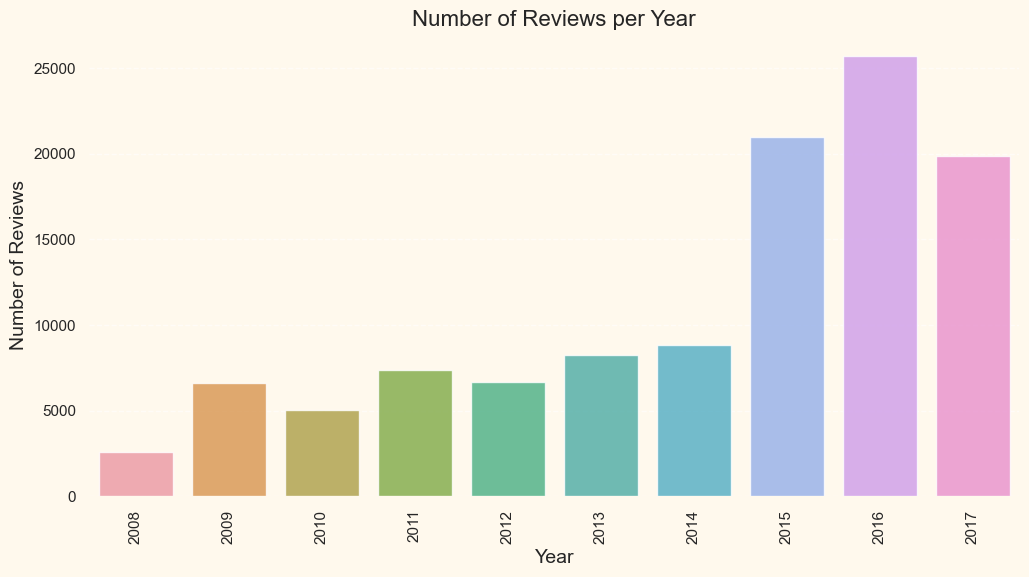

In [211]:
# Brojanje review-ova po godini i njihovo sortiranje
cnt_srs = df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)

plt.xticks(rotation='vertical')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Number of Reviews per Year', fontsize=16)

sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


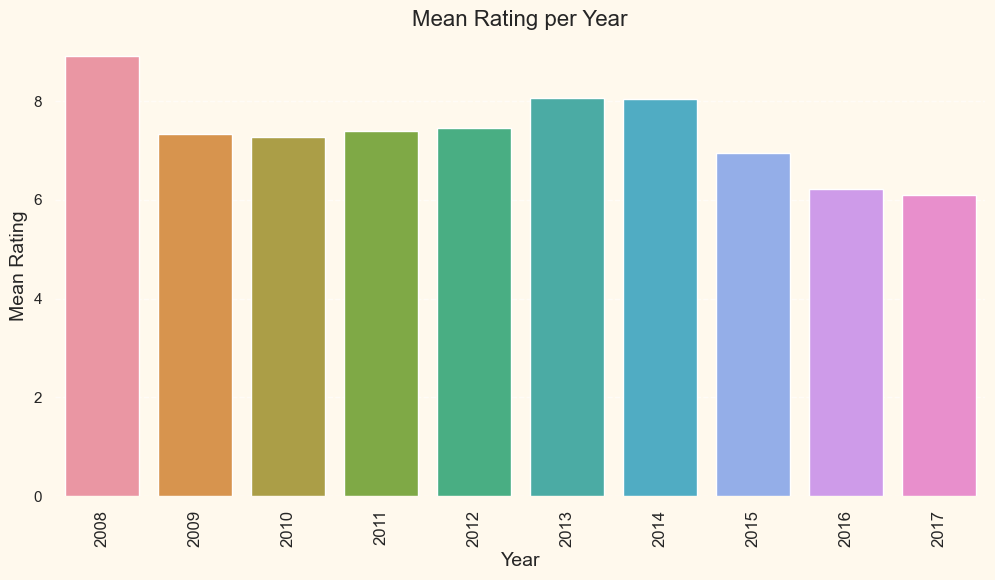

In [212]:
df['year'] = df['date'].dt.year

plt.figure(figsize=(12, 6))

# Grupisanje po godini i računanje srednje vrednosti rejtinga
rating = df.groupby('year')['rating'].mean()

sns.barplot(x=rating.index, y=rating.values)

plt.xticks(rotation='vertical', fontsize=12)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Rating', fontsize=14)
plt.title('Mean Rating per Year', fontsize=16)

sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


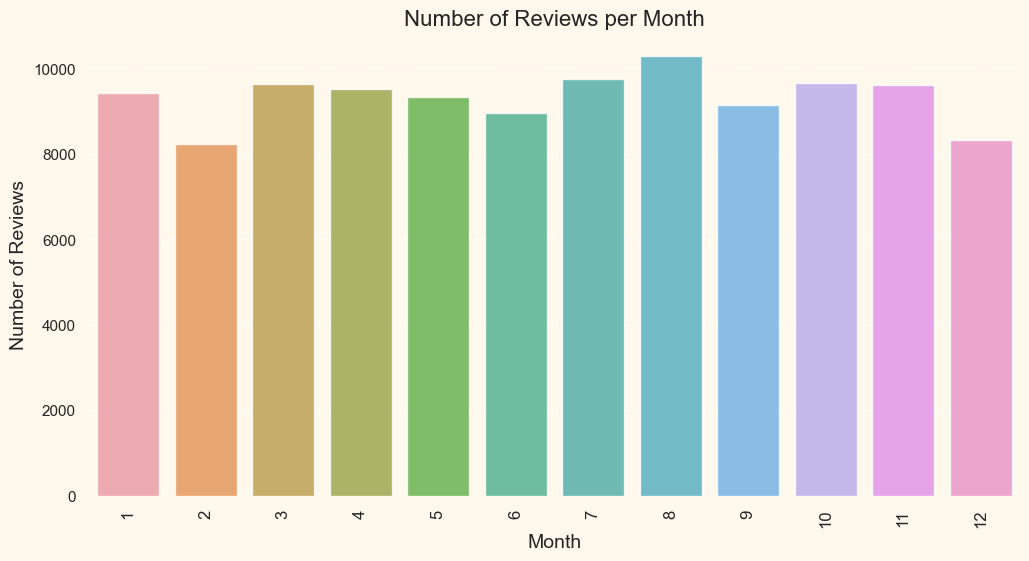

In [213]:
# # Grupisanje po mesecu i računanje srednje vrednosti rejtinga
cnt_srs = df['date'].dt.month.value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)

plt.xticks(rotation='vertical', fontsize=12)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Number of Reviews per Month', fontsize=16)

sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

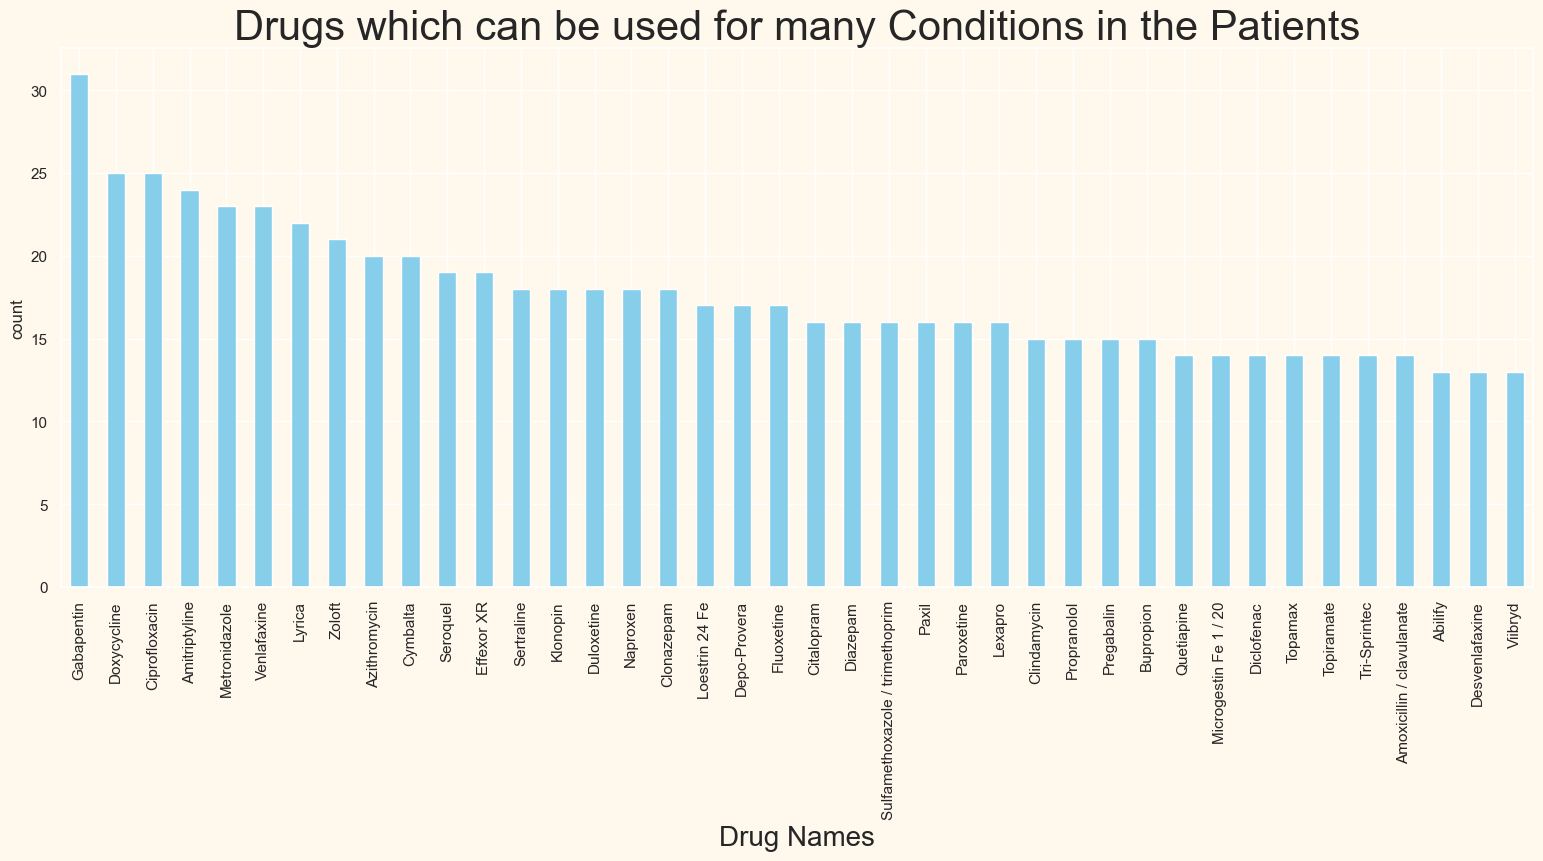

In [214]:
df.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = "skyblue")
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()

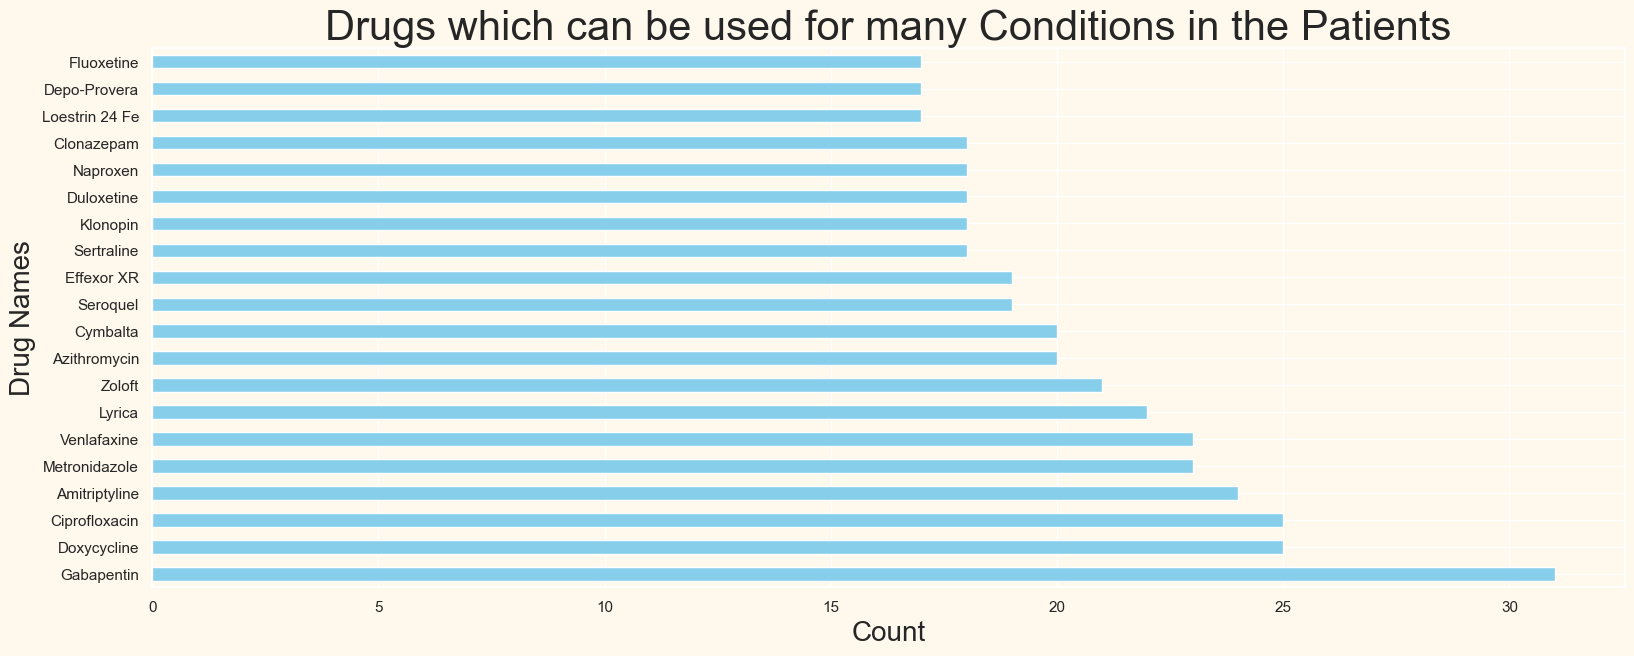

In [215]:
df.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False).head(20).plot.barh(figsize=(19, 7), color="skyblue")
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize=30)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Drug Names', fontsize=20)
plt.show()

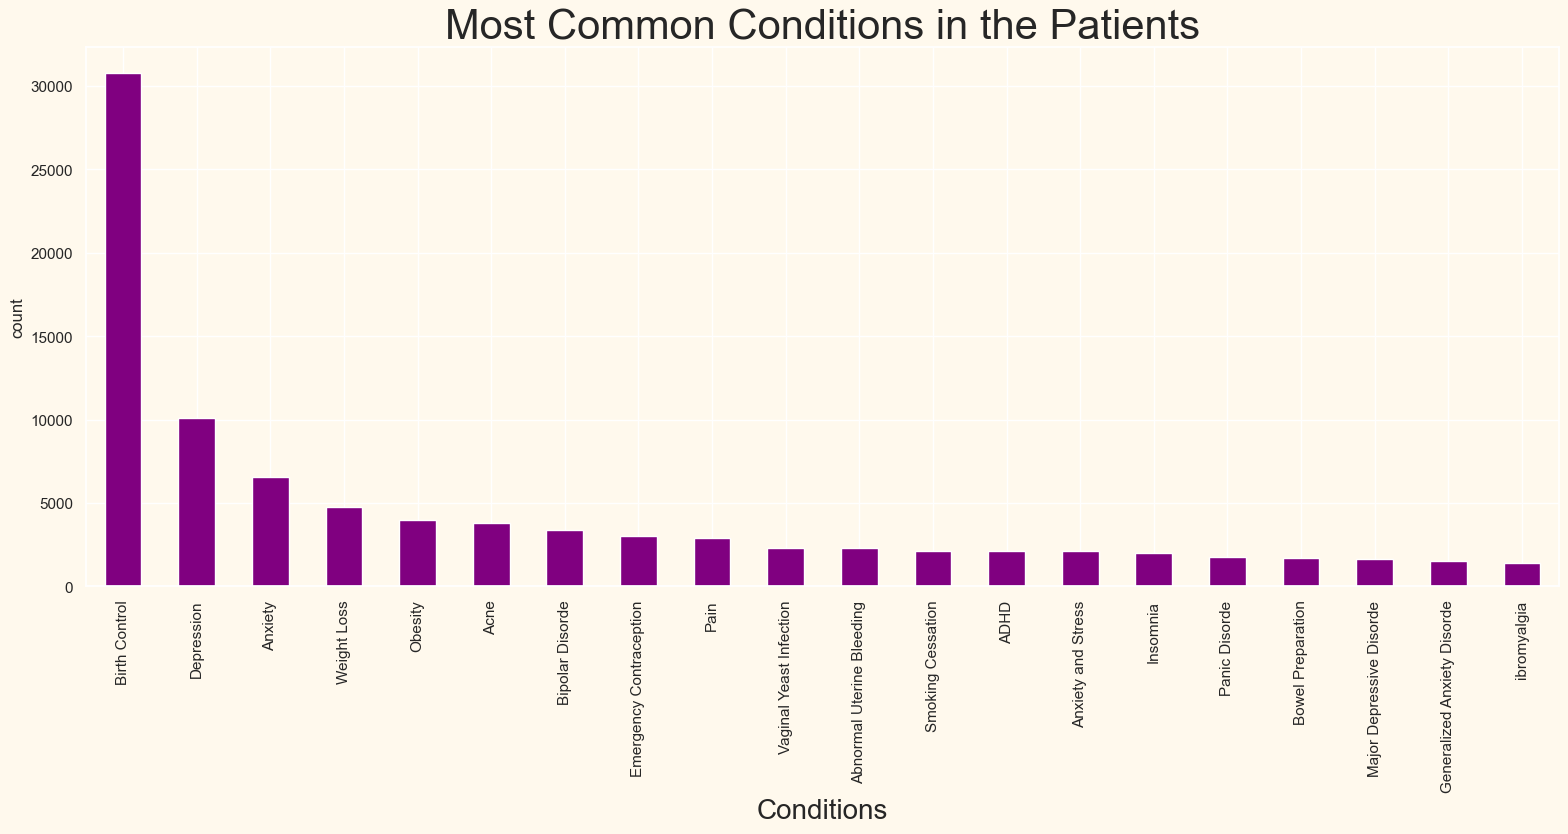

In [216]:
df['condition'].value_counts().head(20).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

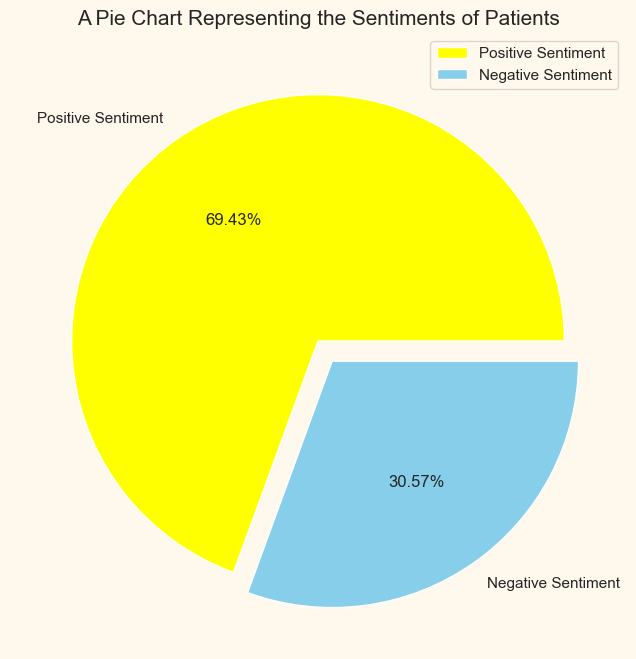

In [217]:
size = [len(df_positive), len(df_negative)]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 15)
plt.legend()
plt.show()

Ovaj odnos pozitivnih i negativnih sentimenata ukazuje na prisutnost nebalansiranosti u podacima.

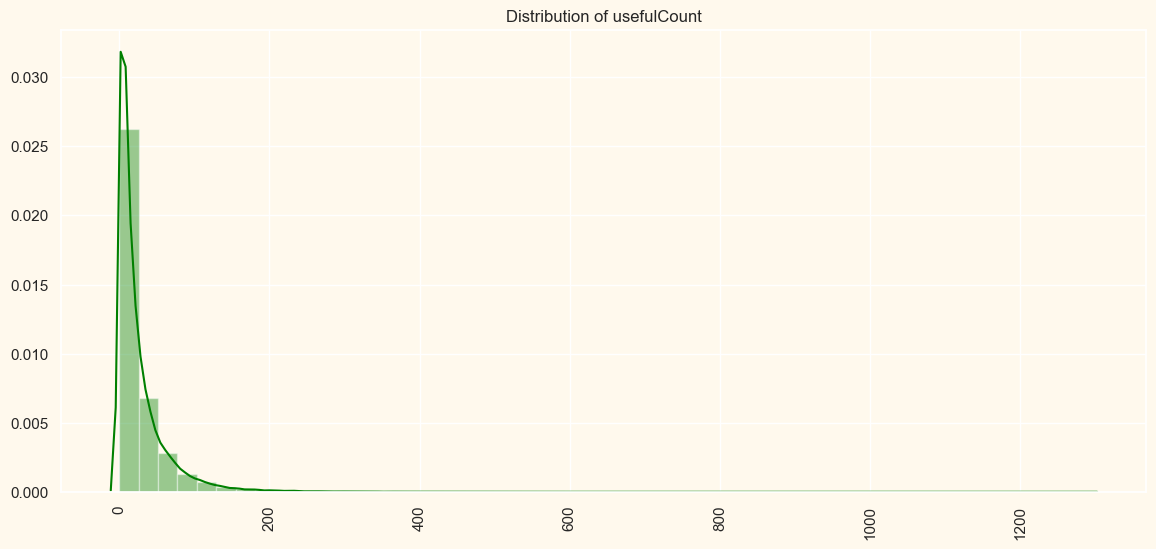

In [218]:
plt.figure(figsize=(14,6))
sns.distplot(df["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [219]:
df["usefulCount"].describe()

count    111847.000000
mean         26.481640
std          38.215949
min           0.000000
25%           5.000000
50%          14.000000
75%          33.000000
max        1291.000000
Name: usefulCount, dtype: float64

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pretprocesiranje podataka</p>

In [220]:
df_transformed = df.copy()

In [221]:
#Funkcije koje vrše zamenu nevalidnih vrednosti za condition najviše mogućim vrednostima.
def replace_most_common_condition(df, drugName, text):
    subset_df = df[df['drugName'] == drugName]
    if not subset_df.empty:
        most_common_condition = subset_df['condition'].mode().values[0]
        df.loc[df['drugName'] == drugName, 'condition'] = df.loc[df['drugName'] == drugName, 'condition'].replace(text, most_common_condition)
    return df

def replace_text_in_condition(df, drugName, text):
    # Create a boolean mask to identify rows where 'drugName' matches and 'condition' contains 'text'
    mask = (df['drugName'] == drugName) & (df['condition'].str.contains(text, na=False))
    
    if mask.any():
        # Get the most common 'condition' value for the 'drugName'
        most_common_condition = df[df['drugName'] == drugName]['condition'].mode().values[0]
        
        # Replace 'text' with the most common 'condition' value for the identified rows
        df.loc[mask, 'condition'] = most_common_condition
    
    return df


In [222]:
filtered_df = df[df['condition'].str.contains('</span> users found this comment helpful.', na=False)]
filtered_df_nl = df[df['condition'] == 'Not Listed / Othe']

unique_drug_names = filtered_df['drugName'].unique()
unique_drug_names_nl = filtered_df_nl['drugName'].unique()


unique_drug_names_list = list(unique_drug_names)
unique_drug_names_list_nl = list(unique_drug_names_nl)

In [223]:
for drugName in unique_drug_names_list:
    df_transformed = replace_text_in_condition(df_transformed, drugName, '</span> users found this comment helpful.')

for drugName in unique_drug_names_list_nl:
    df_transformed = replace_most_common_condition(df_transformed, drugName, 'Not Listed / Othe')

In [224]:
print(len(df_transformed[df_transformed.condition == '1</span> users found this comment helpful.']))
print(len(df_transformed[df_transformed.condition == '2</span> users found this comment helpful.']))
print(len(df_transformed[df_transformed.condition == '3</span> users found this comment helpful.']))
print(len(df_transformed[df_transformed.condition == '4</span> users found this comment helpful.']))
print(len(df_transformed[df_transformed.condition == 'Not Listed / Othe']))

0
0
0
0
0


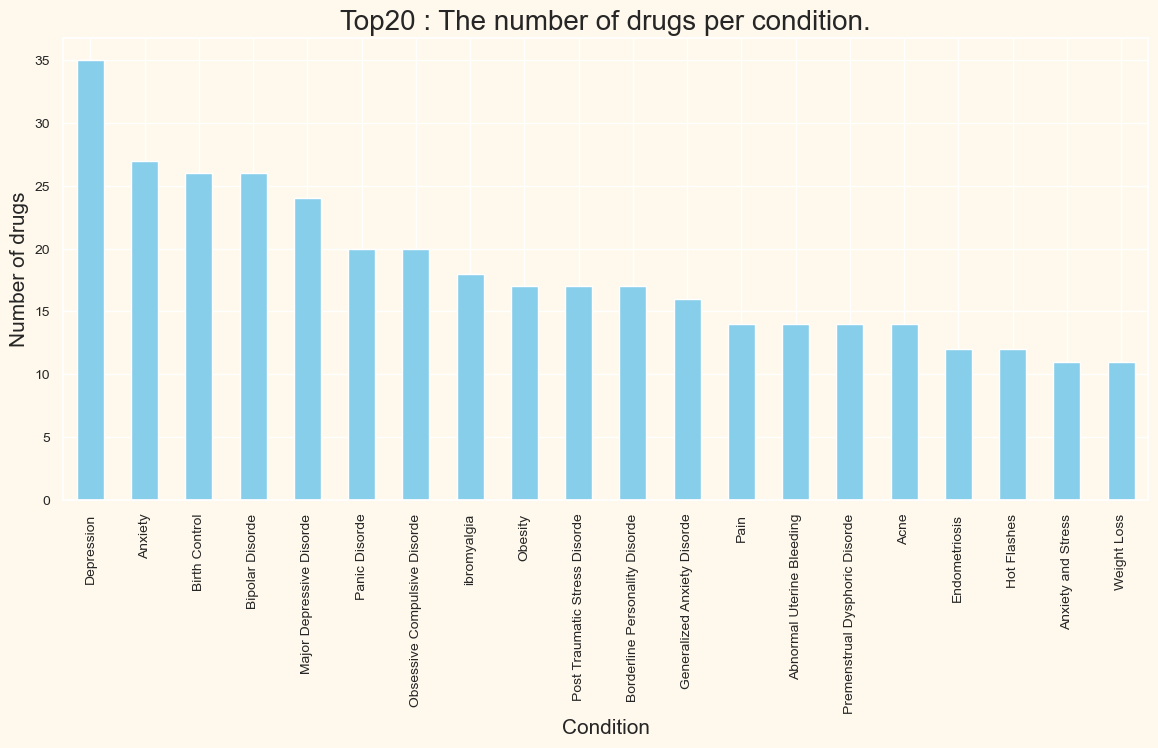

In [225]:
condition_dn = df_transformed.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10, color="skyblue")
plt.xlabel("Condition", fontsize = 15)
plt.ylabel("Number of drugs", fontsize = 15)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20);

Sada to deluje mnogo bolje. Više nema pogrešnih klasifikacija kada su lekovi u pitanju.

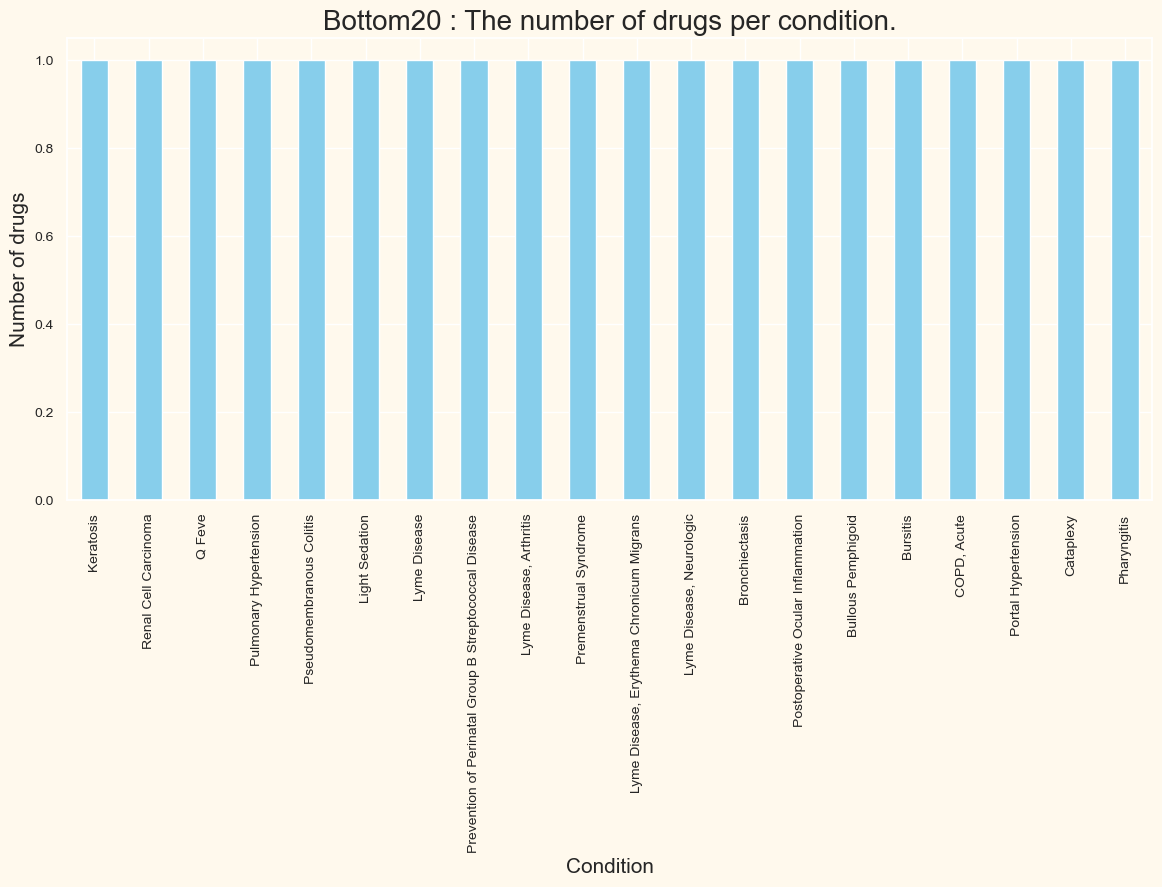

In [226]:
condition_dn = df_transformed.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="skyblue")
plt.xlabel("Condition", fontsize = 15)
plt.ylabel("Number of drugs", fontsize = 15)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20);

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Nedostajući podaci</p>

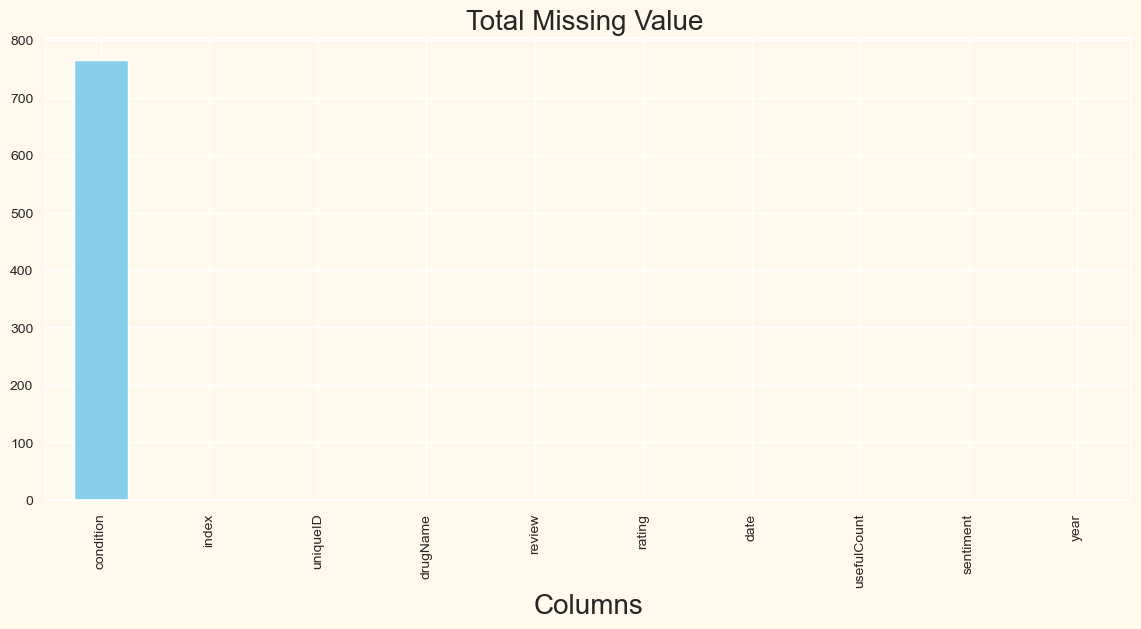

In [227]:
percent = (df_transformed.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='skyblue')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20);

In [228]:
print("Missing value (%):", df_transformed['condition'].isnull().sum()/df.shape[0] *100)

Missing value (%): 0.6848641447691937


Veoma mali procenat nedostajućih podataka -> Možemo bezbedno da ih uklonimo.

In [229]:
df_transformed = df_transformed.dropna()

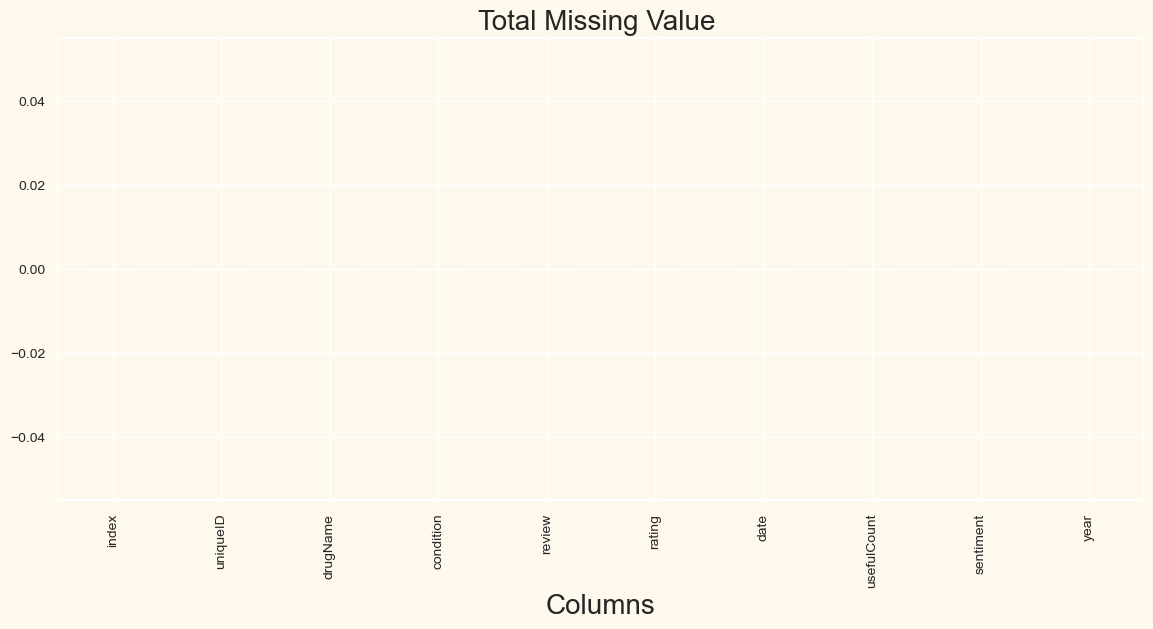

In [230]:
percent = (df_transformed.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='skyblue')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20);

In [231]:
df_transformed.shape[0]

111081

Sledeći korak je brisanje stanja (condition) kojima odgovara samo jedan lek.

In [232]:
# Step 1: Group the dataset by 'condition' and count the unique drugs
condition_counts = df.groupby('condition')['drugName'].nunique().reset_index()

# Step 2: Filter out conditions with only one unique drug
filtered_conditions = condition_counts[condition_counts['drugName'] > 1]['condition']


# Step 3: Delete rows corresponding to filtered conditions
df_transformed = df_transformed[df_transformed['condition'].isin(filtered_conditions)]


In [233]:
df_transformed.shape[0]

109524

In [234]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stops = set(stopwords.words('english'))

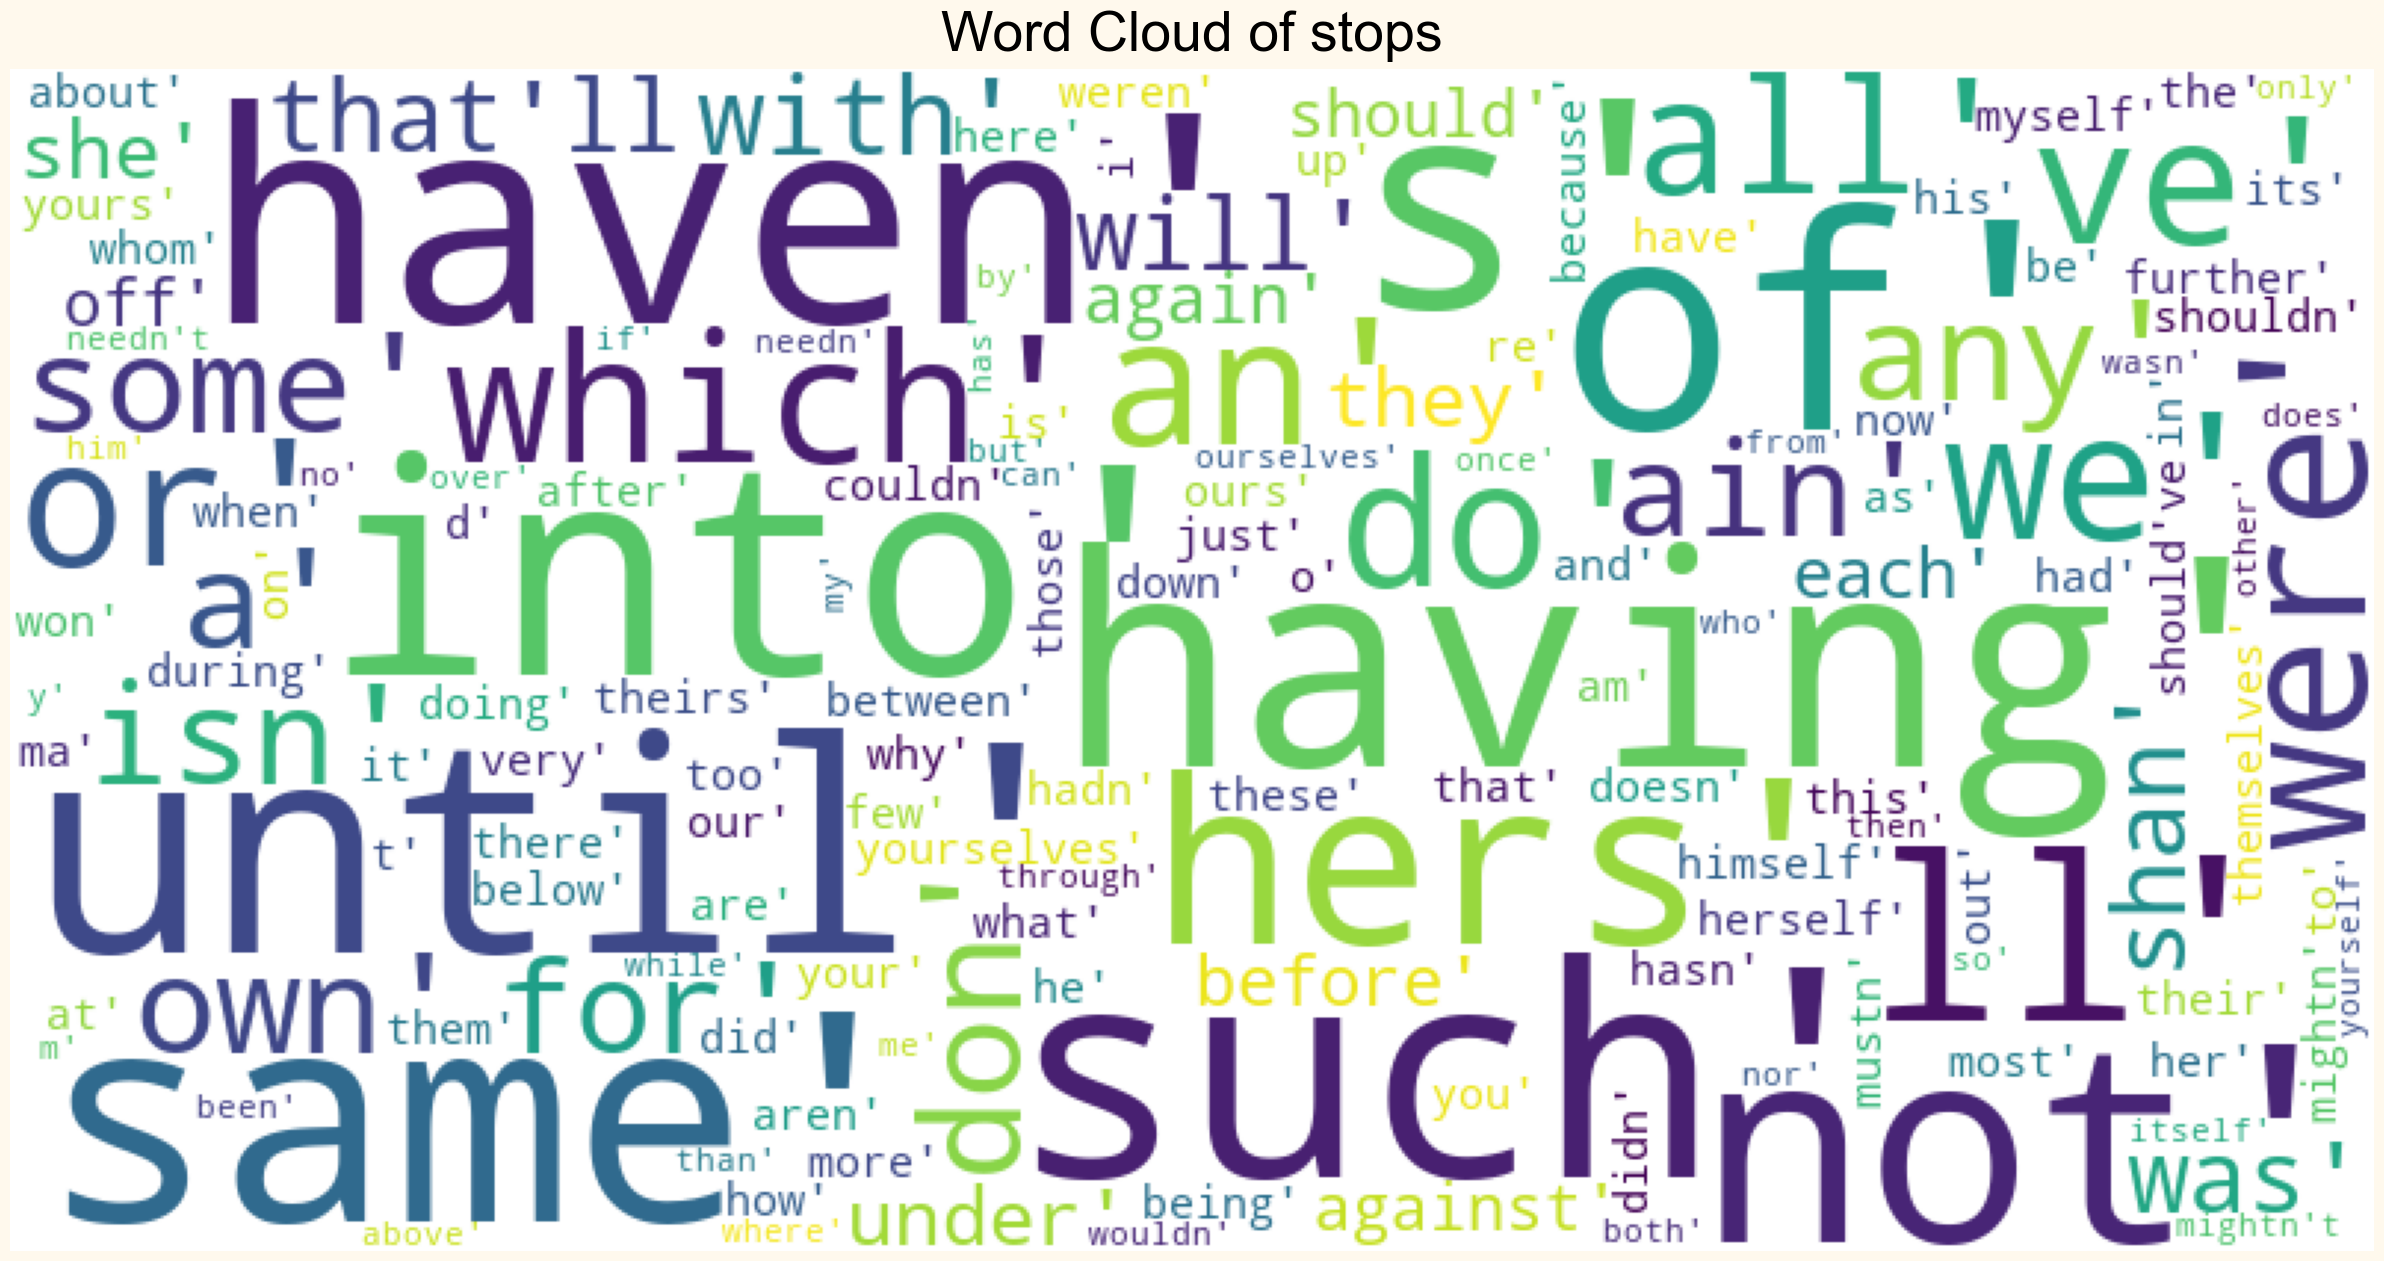

In [235]:
plot_wordcloud(stops, title="Word Cloud of stops")

Vidimo da postoji mnogo reči u stopwords koje su ključne u analizi sentimenata. To su uglavnom reči negacije, kao što su: wouldn't, shouldn't i sl.
Ove reči treba izbaciti iz stop reči.

In [236]:
not_stop = ["couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't",
            "mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]

for word in not_stop:
    stops.remove(word)

In [237]:
plot_wordcloud(stops, title="Word Cloud of stops")

In [239]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_lemma(raw_review):
    # 1. Brisanje HTML-a
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Pravljenje razmaka
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. Pretvaranje svih slova u mala slova
    words = letters_only.lower().split()
    # 5. Ne uzimanje u obzir stop reči 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Lematizacija
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. Join
    return ' '.join(lemmatized_words)


In [240]:
%time df_transformed['review_clean'] = df_transformed['review'].apply(preprocess_lemma)

CPU times: total: 29.7 s
Wall time: 29.7 s


In [241]:
pd.set_option('display.max_colwidth', None)
print(df_transformed["review"][0])

"Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."


In [242]:
print(df_transformed["review_clean"][0])

suboxone completely turned life around feel healthier excelling job always money pocket saving account none suboxone spent year abusing oxycontin paycheck already spent time got started resorting scheming stealing fund addiction history ready stop good chance suboxone put path great life found side effect minimal compared oxycontin actually sleeping better slight constipation truly amazing cost pale comparison spent oxycontin


Vidimo kako je napisana funkcija odradila odličan posao u ovom konkretnom slučaju. Sav nepotreban tekst je izbačen, a reči su pretvorene u njihove osnove.

In [243]:
df_transformed.head(3)

index  uniqueID                  drugName                condition  \
0      4     35696  Buprenorphine / naloxone        Opiate Dependence   
1      6    165907            Levonorgestrel  Emergency Contraception   
2      7    102654              Aripiprazole          Bipolar Disorde   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          review  \
0                "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 "He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant."   
2  "Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."   

   rating       date  usefulCount  sentiment  year  \
0       9 2016-11-27           37          1  2016   
1       1 2017-03-07            5          0  2017   
2      10 2015-03-14           32          1  2015   

                                                                                                                                                                                                                                                                                                                                                                                                                                    review_clean  
0  suboxone completely turned life around feel healthier excelling job always money pocket saving

In [244]:
df_transformed.to_csv("preprocessed_data.csv", index=False)

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Linearna Regresija</p>

In [245]:
df_train, df_test = train_test_split(df_transformed, test_size=0.2, random_state=42)

X_train = df_train['review_clean']

X_test = df_test['review_clean']

y_train = df_train['sentiment']

y_test = df_test['sentiment']

In [246]:
print(df_train.shape[0])
print(df_test.shape[0])

87619
21905


In [247]:
vectorizer_lr = CountVectorizer(min_df=2, ngram_range=(4,4)).fit(X_train)

X_train_vectorized = vectorizer_lr.transform(X_train)

In [248]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# Fit the model to your training data
linear_regression.fit(X_train_vectorized, y_train)

# Predict continuous values (0 to 1) for the test set
y_predictions = linear_regression.predict(vectorizer_lr.transform(X_test))

In [249]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predictions)
print(mae)

0.2859594797407404


In [250]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predictions)

rmse = np.sqrt(mse)

print(rmse)

0.4320214286592632


In [251]:
df_test["lr_pred"] = y_predictions

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model</p>

In [252]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 3,
                             ngram_range=(4, 4),
                             max_features = 3884
                            )
vectorizer

CountVectorizer(max_features=3884, min_df=3, ngram_range=(4, 4))

In [253]:
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [254]:
train_data_features = pipeline.fit_transform(df_train['review_clean'])
print(train_data_features.shape[1])
print(train_data_features.shape[0])
test_data_features = pipeline.fit_transform(df_test['review_clean'])
print(test_data_features.shape[1])
print(test_data_features.shape[0])

3884
87619
3884
21905


In [257]:
train_data_features = train_data_features.toarray()
test_data_features = test_data_features.toarray()

In [258]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()

model = keras.models.Sequential()

model.add(keras.layers.Dense(256, input_shape=(3884,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [259]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               994560    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [260]:
from keras.callbacks import ReduceLROnPlateau
es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", verbose=1, patience=10, restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=5, min_lr=0.00001)

In [261]:
hist = model.fit(train_data_features, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[es, lr])

Epoch 1/30
1096/1096 [==============================] - 16s 14ms/step - loss: 0.5919 - accuracy: 0.7053 - val_loss: 0.5718 - val_accuracy: 0.7127 - lr: 0.0010
Epoch 2/30
1096/1096 [==============================] - 14s 13ms/step - loss: 0.5491 - accuracy: 0.7253 - val_loss: 0.5668 - val_accuracy: 0.7138 - lr: 0.0010
Epoch 3/30
1096/1096 [==============================] - 15s 13ms/step - loss: 0.5323 - accuracy: 0.7320 - val_loss: 0.5731 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 4/30
1096/1096 [==============================] - 14s 13ms/step - loss: 0.5220 - accuracy: 0.7359 - val_loss: 0.5744 - val_accuracy: 0.7156 - lr: 0.0010
Epoch 5/30
1096/1096 [==============================] - 14s 13ms/step - loss: 0.5138 - accuracy: 0.7391 - val_loss: 0.5746 - val_accuracy: 0.7180 - lr: 0.0010
Epoch 6/30
1096/1096 [==============================] - 15s 13ms/step - loss: 0.5065 - accuracy: 0.7419 - val_loss: 0.5853 - val_accuracy: 0.7178 - lr: 0.0010
Epoch 7/30
1096/1096 [========================

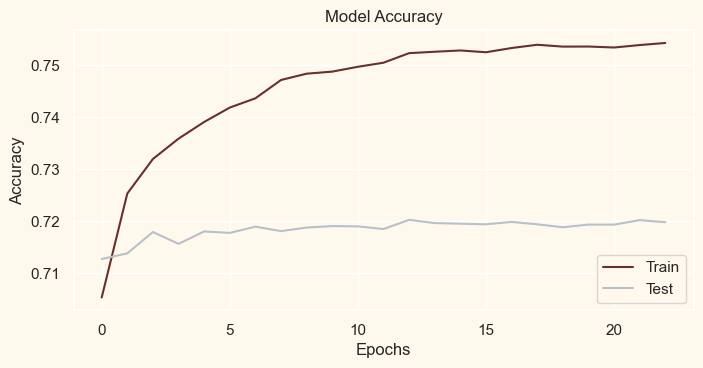

In [262]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right');

Na slici vidimo kako accuracy konstantno raste, dok val_accuracy raste nešto sporije. Ovo ukazuje na potencijalno postojanje overfittinga u ovom slučaju.

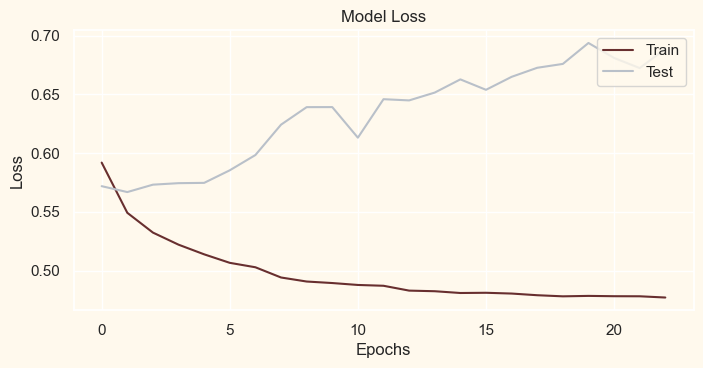

In [263]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right');

Vidimo kako val_loss takođe raste, što potvrđuje teoriju da dolazi do određene doze overfittinga. Bitno je napomenuti je probano sa različitim modelima i načinima regularizacije, ali da je ovo najbolje što sam dobio. Razlog je verovatno korišćenje smanjenog skupa podataka.

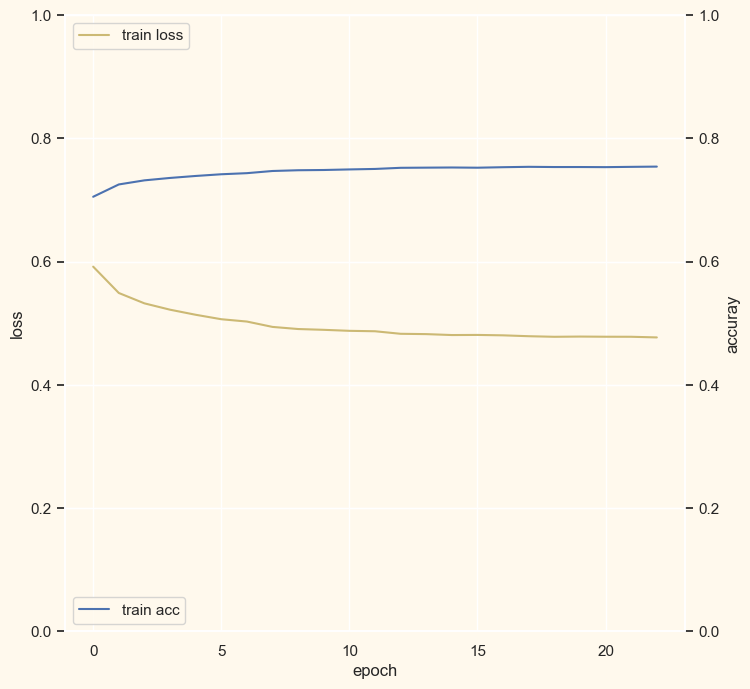

In [264]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [265]:
loss_and_metrics = model.evaluate(test_data_features, y_test, batch_size=64)
print(loss_and_metrics)

343/343 [==============================] - 1s 3ms/step - loss: 1.1100 - accuracy: 0.6562
[1.1099692583084106, 0.656242847442627]


In [266]:
sub_preds_deep = model.predict(test_data_features,batch_size=64)

343/343 [==============================] - 1s 3ms/step


In [267]:
sub_preds_deep

array([[0.7085786],
       [0.9966102],
       [0.6696506],
       ...,
       [0.6696506],
       [0.5877512],
       [0.6696506]], dtype=float32)

In [494]:
sub_preds_deep_rounded = np.round(sub_preds_deep)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, sub_preds_deep_rounded))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_df_full = pd.DataFrame(confusion_matrix(y_test, sub_preds_deep_rounded))
confusion_df_full.index = ['Actual 0', 'Actual 1']
confusion_df_full.columns = ['Predicted 0', 'Predicted 1']
confusion_df_full

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df_full, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

In [268]:
df_test['deep_pred'] = sub_preds_deep

In [269]:
model.save("custom_model_latest_best2.h5")

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Analiza korišćenjem rečnika</p>

In [270]:
columns_to_load = ["Entry","Source", "Positiv", "Negativ"]

word_table = pd.read_csv("data/harvard-general-inquirer-basic.csv", usecols=columns_to_load)

In [271]:
word_table.head()

Entry Source Positiv  Negativ
0            A  H4Lvd     NaN      NaN
1      ABANDON  H4Lvd     NaN  Negativ
2  ABANDONMENT     H4     NaN  Negativ
3        ABATE  H4Lvd     NaN  Negativ
4    ABATEMENT    Lvd     NaN      NaN

In [272]:
#Pravljenje liste sentimenata
#Positiv word list   
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
print(len(Positiv_word_list))

#Negativ word list          
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
print(len(Negativ_word_list))

1637
2006


In [273]:
vectorizer_dic = CountVectorizer(vocabulary = Positiv_word_list)

In [274]:
content = df_test['review_clean']
X = vectorizer_dic.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test["num_Negativ_word"] = f2.sum(axis=1)

In [275]:
df_test["Positiv_ratio"] = df_test["num_Positiv_word"]/(df_test["num_Positiv_word"]+df_test["num_Negativ_word"])

In [279]:
df_test["Positiv_ratio"].fillna(0.5, inplace=True)

num_Positiv_word je broj pojavljivanja odgovarajućih reči u rečniku kao pozitivne (rečnik može sadržati duplikate jedne iste reči, ali ih klasifikovati kao pozitivne i negativne, zavisno od situacije)

In [280]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the "usefulCount" column
df_test["usefulCount_normalized"] = scaler.fit_transform(df_test[["usefulCount"]])

In [281]:
df_test['total_pred'] = (df_test['deep_pred'] + df_test['lr_pred'] + df_test['Positiv_ratio'])*df_test['usefulCount_normalized']

In [283]:
df_test[df_test['total_pred']>0.5]

index  uniqueID       drugName           condition  \
41948    80807    222844        Topamax             Obesity   
36860    71069    160633      Buspirone             Anxiety   
17359    33552    119152         Zoloft          Depression   
48770    93984    178406     Duloxetine          Depression   
1411      2750     45831     Fluoxetine  Anxiety and Stress   
98845    28789    228099   Etonogestrel       Birth Control   
901       1760    231773      Trazodone            Insomnia   
151        314    142104   Escitalopram          Depression   
27192    52283    201195         Zoloft          Depression   
11331    21799     95828     Sertraline  Anxiety and Stress   
8785     17016    126306        Viibryd          Depression   
87754     7474     62760     Citalopram          Depression   
110307   50903    160588      Buspirone             Anxiety   
3476      6716     96616     Sertraline          Depression   
947       1851    126259        Viibryd          Depression   
2855      5491     77170     Lorcaserin         Weight Loss   
16991    32853    205853        Pristiq          Depression   
87143     6311     62640     Citalopram          Depression   
68536   131873     89754         Celexa          Depression   
15657    30257     50489     Gabapentin             Anxiety   
108057   46549    181620         Prozac  Anxiety and Stress   
46730    90071    169147     Vilazodone          Depression   
1041      2039     62757     Citalopram          Depression   
30480    58608    139141    Phentermine         Weight Loss   
63918   122909    169693  Amitriptyline                Pain   
4388      8458    181286         Prozac  Anxiety and Stress   
21903    42181     52049       Adipex-P             Obesity   
107729   45906    169146     Vilazodone          Depression   
85420     3014     96501     Sertraline          Depression   
57379   110462    119089         Zoloft          Depression   
82264   158284    189511      Oxycodone                Pain   
14923    28825    226000      Bupropion          Depression   
74000   142329     89748         Celexa  Anxiety and Stress   
42336    81546    201628     Alprazolam             Anxiety   
79546   153062     95868     Sertraline          Depression   
84537     1306     64386     Sertraline          Depression   
94023    19489     62082     Citalopram  Anxiety and Stress   
11327    21790     28850        Lexapro          Depression   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">REZULTAT 1</p>

In [504]:
df_test_result = df_test.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})
df_test_result

total_pred
                                                     mean
condition      drugName                                  
ADHD           Amphetamine / dextroamphetamine   0.043752
               Bupropion                         0.112910
               Desvenlafaxine                    0.026643
               Lisdexamfetamine                  0.040730
               Methylphenidate                   0.051688
...                                                   ...
ibromyalgia    Topiramate                        0.032464
               Tramadol                          0.081103
               Trazodone                         0.034457
               Venlafaxine                       0.059858
m Pain Disorde Amitriptyline                     0.013144

[654 rows x 1 columns]

In [505]:
# Group by 'condition' and 'drugName' and calculate the mean
df_test_result = df_test.groupby(['condition', 'drugName']).agg({'total_pred': 'mean'})

In [506]:
# Sort by mean within each group
df_test_result = df_test_result.groupby('condition', group_keys=False).apply(lambda x: x.sort_values('total_pred', ascending=False))

df_test_result

total_pred
condition      drugName                                   
ADHD           Bupropion                          0.112910
               Methylphenidate                    0.051688
               Vyvanse                            0.047217
               Amphetamine / dextroamphetamine    0.043752
               Lisdexamfetamine                   0.040730
...                                                    ...
ibromyalgia    Pristiq                            0.035606
               Trazodone                          0.034457
               Topiramate                         0.032464
               Escitalopram                       0.031504
m Pain Disorde Amitriptyline                      0.013144

[654 rows x 1 columns]

In [507]:
best_drugs_per_condition_full = df_test_result.groupby('condition').head(1)

In [508]:
best_drugs_per_condition_full

total_pred
condition                     drugName                                   
ADHD                          Bupropion                          0.112910
Abnormal Uterine Bleeding     Levonorgestrel                     0.024570
Acne                          Clindamycin                        0.038889
Acute Nonlymphocytic Leukemia Isotretinoin                       0.015593
Agitated State                Aripiprazole                       0.085305
...                                                                   ...
Vulvodynia                    Tramadol                           0.061857
Weight Loss                   Lorcaserin                         0.092014
atigue                        Amphetamine / dextroamphetamine    0.060490
ibromyalgia                   Topamax                            0.087463
m Pain Disorde                Amitriptyline                      0.013144

[126 rows x 1 columns]

In [509]:
conditions_full, drugs_full = zip(*best_drugs_per_condition_full.index)

In [510]:
ten_conditions_full = conditions_full[:10]
ten_drugs_full = drugs_full[:10]
ten_best_values_full = best_drugs_per_condition_full['total_pred'].head(10)

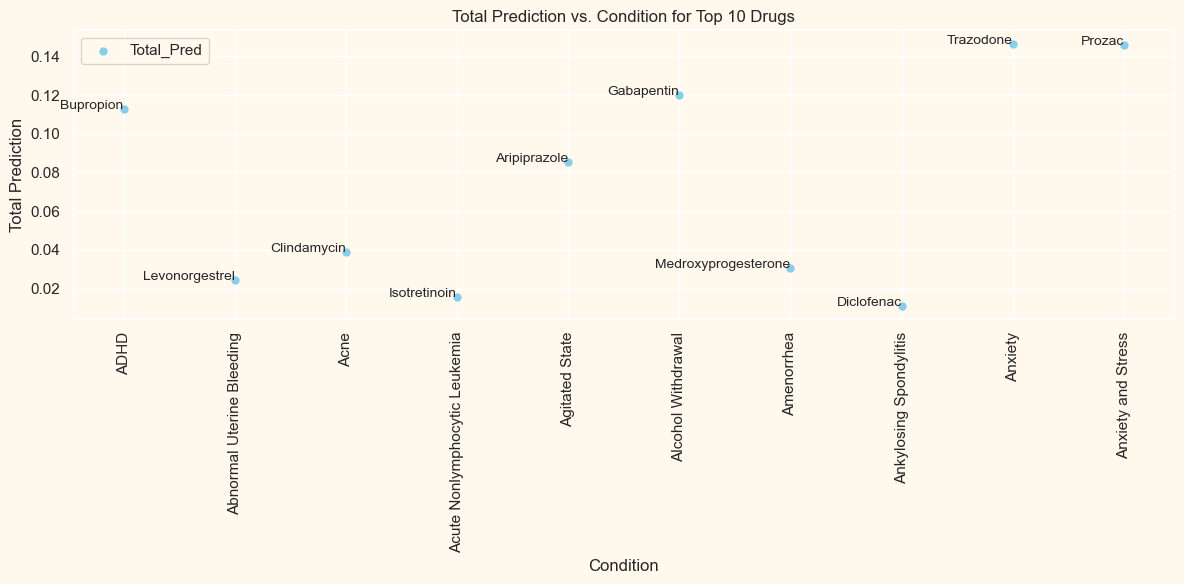

In [512]:
data_full = pd.DataFrame({'Condition': ten_conditions_full, 'Drug': ten_drugs_full, 'Total_Pred': ten_best_values_full})

# Kreiranje tačkastog grafikona
plt.figure(figsize=(12, 6))
plt.scatter(data_full['Condition'], data_full['Total_Pred'], s=100, c='skyblue', marker='.', label='Total_Pred')
plt.xlabel('Condition')
plt.ylabel('Total Prediction')
plt.title('Total Prediction vs. Condition for Top 10 Drugs')
plt.xticks(rotation=90)
plt.legend()

# Dodavanje imena lekova pored tačaka
for i, txt in enumerate(data_full['Drug']):
    plt.annotate(txt, (data_full['Condition'].iloc[i], data_full['Total_Pred'].iloc[i]), fontsize=10, ha='right')

plt.tight_layout()

# Prikazivanje grafikona
plt.show()

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dodatno smanjenje skupa podataka zbog kompleksnosti GPT modela.</p>

In [340]:
df_transformed_reduced = df_transformed.sample(frac=0.3, random_state=42)

df_transformed_reduced.reset_index(inplace=True)

In [341]:
df_train_reduced, df_test_reduced = train_test_split(df_transformed_reduced, test_size=0.2, random_state=42)

X_train_reduced = df_train_reduced['review_clean']

X_test_reduced = df_test_reduced['review_clean']

y_train_reduced = df_train_reduced['sentiment']

y_test_reduced = df_test_reduced['sentiment']

In [342]:
print(df_train_reduced.shape[0])
print(df_test_reduced.shape[0])

26285
6572


# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Linearna Regresija (Reduced)</p>

In [343]:
vectorizer_lr_reduced = CountVectorizer(min_df=2, ngram_range=(4,4)).fit(X_train_reduced)

X_train_reduced_vectorized = vectorizer_lr_reduced.transform(X_train_reduced)

In [344]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# Fit the model to your training data
linear_regression.fit(X_train_reduced_vectorized, y_train_reduced)

# Predict continuous values (0 to 1) for the test set
y_predictions = linear_regression.predict(vectorizer_lr_reduced.transform(X_test_reduced))

In [345]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_reduced, y_predictions)
print(mae)

0.4536010927430922


In [346]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_reduced, y_predictions)

rmse = np.sqrt(mse)

print(rmse)

0.5971856046399971


In [347]:
df_test_reduced["lr_pred"] = y_predictions

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Custom Model (Reduced)</p>

In [353]:
vectorizer_reduced = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 3,
                             ngram_range=(4, 4),
                             max_features = 444
                            )
vectorizer_reduced

CountVectorizer(max_features=444, min_df=3, ngram_range=(4, 4))

In [354]:
pipeline = Pipeline([
    ('vect', vectorizer_reduced),
])

In [355]:
train_data_features_reduced = pipeline.fit_transform(df_train_reduced['review_clean'])
print(train_data_features_reduced.shape[1])
print(train_data_features_reduced.shape[0])
test_data_features_reduced = pipeline.fit_transform(df_test_reduced['review_clean'])
print(test_data_features_reduced.shape[1])
print(test_data_features_reduced.shape[0])

444
26285
444
6572


In [356]:
train_data_features_reduced = train_data_features_reduced.toarray()
test_data_features_reduced = test_data_features_reduced.toarray()

In [357]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

y_train_reduced = df_train_reduced['sentiment']
y_test_reduced = df_test_reduced['sentiment']
solution = y_test_reduced.copy()

model_reduced = keras.models.Sequential()

model_reduced.add(keras.layers.Dense(256, input_shape=(444,)))
model_reduced.add(keras.layers.BatchNormalization())
model_reduced.add(keras.layers.Activation('relu'))
model_reduced.add(keras.layers.Dropout(0.3))

model_reduced.add(keras.layers.Dense(512))
model_reduced.add(keras.layers.BatchNormalization())
model_reduced.add(keras.layers.Activation('relu'))
model_reduced.add(keras.layers.Dropout(0.25))

model_reduced.add(keras.layers.Dense(128, activation='relu'))
model_reduced.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model_reduced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [358]:
model_reduced.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               113920    
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_84 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [359]:
from keras.callbacks import ReduceLROnPlateau
es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", verbose=1, patience=10, restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=5, min_lr=0.00001)

In [360]:
hist_reduced = model_reduced.fit(train_data_features_reduced, y_train_reduced, epochs=30, batch_size=64, validation_split=0.2, callbacks=[es, lr])

Epoch 1/30
329/329 [==============================] - 19s 57ms/step - loss: 0.6256 - accuracy: 0.6913 - val_loss: 0.6248 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 2/30
329/329 [==============================] - 19s 58ms/step - loss: 0.6013 - accuracy: 0.6995 - val_loss: 0.6079 - val_accuracy: 0.6943 - lr: 0.0010
Epoch 3/30
329/329 [==============================] - 20s 59ms/step - loss: 0.5955 - accuracy: 0.7029 - val_loss: 0.6041 - val_accuracy: 0.6943 - lr: 0.0010
Epoch 4/30
329/329 [==============================] - 19s 59ms/step - loss: 0.5907 - accuracy: 0.7033 - val_loss: 0.6197 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 5/30
329/329 [==============================] - 19s 56ms/step - loss: 0.5882 - accuracy: 0.7048 - val_loss: 0.6096 - val_accuracy: 0.6968 - lr: 0.0010
Epoch 6/30
329/329 [==============================] - 19s 57ms/step - loss: 0.5878 - accuracy: 0.7044 - val_loss: 0.6074 - val_accuracy: 0.6970 - lr: 0.0010
Epoch 7/30
329/329 [==============================] - 19s 

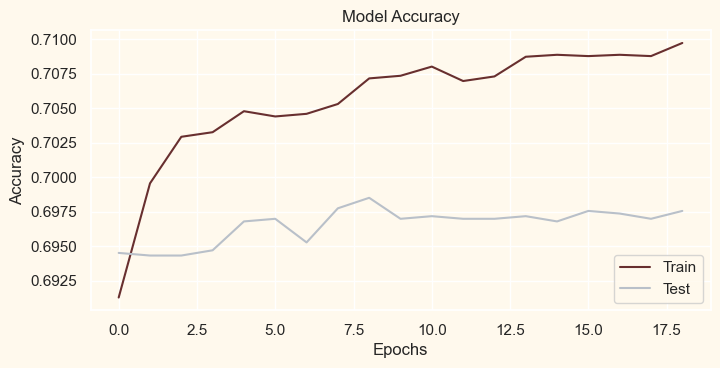

In [361]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist_reduced.history['accuracy'])
plt.plot(hist_reduced.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right');

Na iznenađenje, nad manjim skupom podataka dobijamo približne rezultate kao malopre sa manjom pojavom overfittinga.

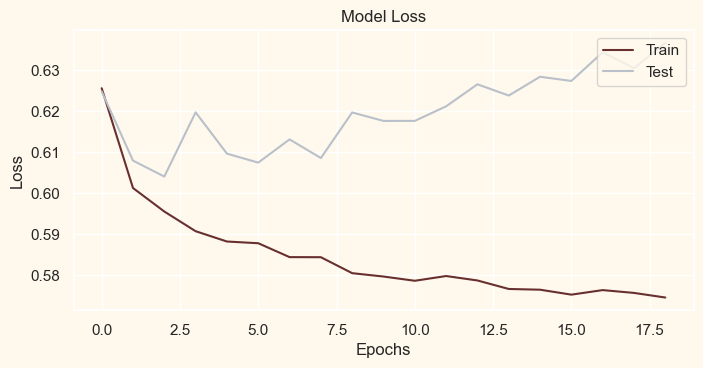

In [362]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist_reduced.history['loss'])
plt.plot(hist_reduced.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right');

Međutim, vidimo da val_loss i dalje raste.

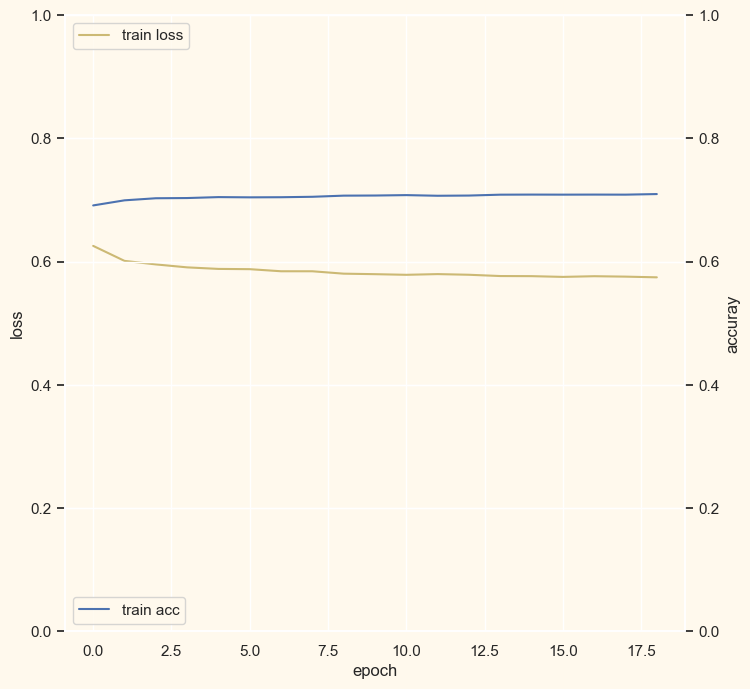

In [363]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist_reduced.history['loss'], 'y', label='train loss')
acc_ax.plot(hist_reduced.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [364]:
loss_and_metrics_reduced = model_reduced.evaluate(test_data_features_reduced, y_test_reduced, batch_size=64)
print(loss_and_metrics)

103/103 [==============================] - 1s 11ms/step - loss: 0.7244 - accuracy: 0.6799
[1.1099692583084106, 0.656242847442627]


In [365]:
sub_preds_deep_reduced = model_reduced.predict(test_data_features_reduced,batch_size=64)

103/103 [==============================] - 1s 6ms/step


In [366]:
sub_preds_deep_reduced

array([[0.6871019 ],
       [0.6871019 ],
       [0.6378968 ],
       ...,
       [0.6871019 ],
       [0.6871019 ],
       [0.32310212]], dtype=float32)

In [489]:
sub_preds_deep_reduced_rounded = np.round(sub_preds_deep_reduced)

In [490]:
sub_preds_deep_reduced_rounded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [491]:
from sklearn.metrics import classification_report
print(classification_report(y_test_reduced, sub_preds_deep_reduced_rounded))

              precision    recall  f1-score   support

           0       0.25      0.03      0.05      2005
           1       0.69      0.97      0.81      4567

    accuracy                           0.68      6572
   macro avg       0.47      0.50      0.43      6572
weighted avg       0.56      0.68      0.58      6572



In [492]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test_reduced, sub_preds_deep_reduced_rounded))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

Predicted 0  Predicted 1
Actual 0           51         1954
Actual 1          150         4417

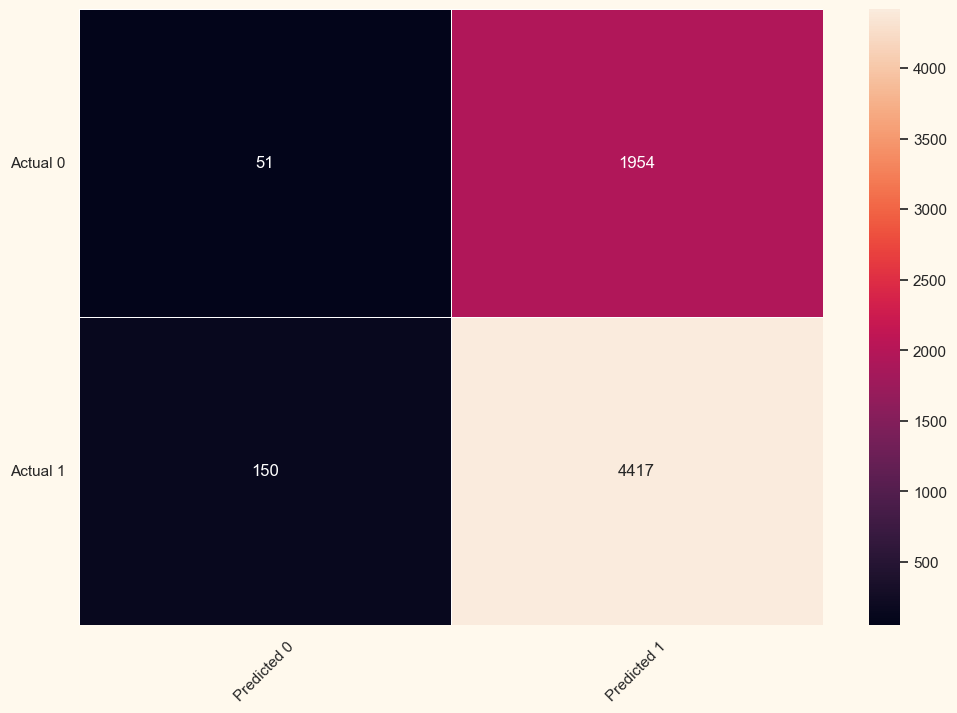

In [493]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

In [367]:
df_test_reduced['deep_pred'] = sub_preds_deep_reduced

In [368]:
model_reduced.save("custom_model_latest_reduced.h5")

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Analiza korišćenjem rečnika (Reduced)</p>

In [369]:
columns_to_load = ["Entry","Source", "Positiv", "Negativ"]

word_table = pd.read_csv("data/harvard-general-inquirer-basic.csv", usecols=columns_to_load)

In [370]:
##1. make list of sentiment
#Positiv word list   
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
print(len(Positiv_word_list))

#Negativ word list          
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
print(len(Negativ_word_list))

1637
2006


In [371]:
vectorizer_dic = CountVectorizer(vocabulary = Positiv_word_list)

In [372]:
content = df_test_reduced['review_clean']
X = vectorizer_dic.fit_transform(content)
f = X.toarray()
f = pd.DataFrame(f)
f.columns=Positiv_word_list
df_test_reduced["num_Positiv_word"] = f.sum(axis=1)

vectorizer2 = CountVectorizer(vocabulary = Negativ_word_list)
content = df_test_reduced['review_clean']
X2 = vectorizer2.fit_transform(content)
f2 = X2.toarray()
f2 = pd.DataFrame(f2)
f2.columns=Negativ_word_list
df_test_reduced["num_Negativ_word"] = f2.sum(axis=1)

In [373]:
df_test_reduced["Positiv_ratio"] = df_test_reduced["num_Positiv_word"]/(df_test_reduced["num_Positiv_word"]+df_test_reduced["num_Negativ_word"])
df_test_reduced["Positiv_ratio"].fillna(0.5, inplace=True)

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Transfer Learning (GPT2 Model)</p>

In [376]:
from transformers import GPT2Tokenizer, TFGPT2Model
MAX_LENGTH = 20
PAD_TOKEN = "<|pad|>"
EOS_TOKEN = "<|endoftext|>"

# this will download and initialize the pre trained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2",
    pad_token=PAD_TOKEN,
    eos_token=EOS_TOKEN,
    max_length=MAX_LENGTH,
    is_split_into_words=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [377]:
X_train = [str(ex) + EOS_TOKEN for ex in X_train_reduced]
X_test = [str(ex) + EOS_TOKEN for ex in X_test_reduced ]

In [378]:
import tensorflow as tf
X_train_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_train]
X_test_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)['input_ids'] for x in X_test]

X_train_in = tf.squeeze(tf.convert_to_tensor(X_train_), axis=1)
X_test_in = tf.squeeze(tf.convert_to_tensor(X_test_), axis=1)

In [379]:
X_train_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_train]
X_test_mask_ = [tokenizer(str(x), return_tensors='tf', max_length=MAX_LENGTH, truncation=True, pad_to_max_length=True, add_special_tokens=True)["attention_mask"] for x in X_test]

X_train_mask = tf.squeeze(tf.convert_to_tensor(X_train_mask_), axis=1)
X_test_mask = tf.squeeze(tf.convert_to_tensor(X_test_mask_), axis=1)

In [380]:
model = TFGPT2Model.from_pretrained("gpt2", use_cache=False,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id)
model.training = True

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [381]:
model.resize_token_embeddings(len(tokenizer))

In [382]:
for layer in model.layers:
    layer.trainable = False

In [383]:
model.summary()

Model: "tfgpt2_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 124440576 
 r)                                                              
                                                                 
Total params: 124,440,576
Trainable params: 0
Non-trainable params: 124,440,576
_________________________________________________________________


In [384]:
input = tf.keras.layers.Input(shape=(None,), dtype='int32')
mask = tf.keras.layers.Input(shape=(None,), dtype='int32')
x = model(input, attention_mask=mask)
x = tf.reduce_mean(x.last_hidden_state, axis=1)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [385]:
clf = tf.keras.Model([input, mask], output)

In [386]:
clf.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 tfgpt2_model_2 (TFGPT2Model)   TFBaseModelOutputWi  124440576   ['input_5[0][0]',                
                                thPastAndCrossAtten               'input_6[0][0]']                
                                tions(last_hidden_s                                               
                                tate=(None, None, 7                                         

In [387]:
base_learning_rate = 0.0001
optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate)
loss=tf.keras.losses.BinaryCrossentropy()

clf.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [388]:
callbacks = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", verbose=1, patience=4, restore_best_weights=True)

In [392]:
y_train_in = tf.constant(y_train_reduced, dtype=tf.int32)
y_test_in = tf.constant(y_test_reduced, dtype=tf.int32)

In [393]:
tf.config.run_functions_eagerly(True)

In [394]:
history = clf.fit([X_train_in, X_train_mask], y_train_in, epochs=10, batch_size=64, validation_split=0.2, callbacks=callbacks)

Epoch 1/10
329/329 [==============================] - 2157s 7s/step - loss: 2.8720 - accuracy: 0.5226 - val_loss: 0.9078 - val_accuracy: 0.6888
Epoch 2/10
329/329 [==============================] - 2168s 7s/step - loss: 1.3076 - accuracy: 0.5913 - val_loss: 0.6788 - val_accuracy: 0.6869
Epoch 3/10
329/329 [==============================] - 2081s 6s/step - loss: 0.7783 - accuracy: 0.6227 - val_loss: 0.6093 - val_accuracy: 0.6873
Epoch 4/10
329/329 [==============================] - 2188s 7s/step - loss: 0.6352 - accuracy: 0.6675 - val_loss: 0.6018 - val_accuracy: 0.6886
Epoch 5/10
329/329 [==============================] - 2244s 7s/step - loss: 0.6137 - accuracy: 0.6874 - val_loss: 0.5963 - val_accuracy: 0.6899
Epoch 6/10
329/329 [==============================] - 2203s 7s/step - loss: 0.6046 - accuracy: 0.6926 - val_loss: 0.5918 - val_accuracy: 0.6907
Epoch 7/10
329/329 [==============================] - 2088s 6s/step - loss: 0.6013 - accuracy: 0.6942 - val_loss: 0.5887 - val_accuracy:

In [395]:
clf.save("gpt2_finetuned_fully_tokenized.h5")

Primetno je da je sa drastično manjim skupom podataka dobijamo slične rezultate kada koristimo gpt2 model. Takođe, možemo primetiti i da je najbolji rezultat dobijen u pretposlednjoj epohi, tako da možemo zaključiti da bi sa povećanjem broja epoha bili dobijeni još bolji rezultati. Nažalost, zbog ograničenih performansi računara ovo nije bilo moguće ispitati.

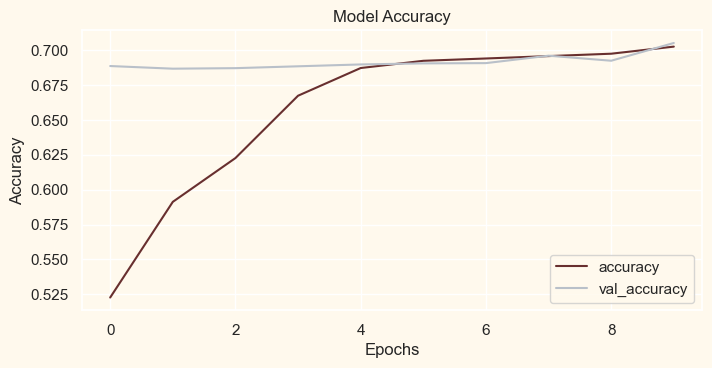

In [422]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right');

Nema overfitting-a

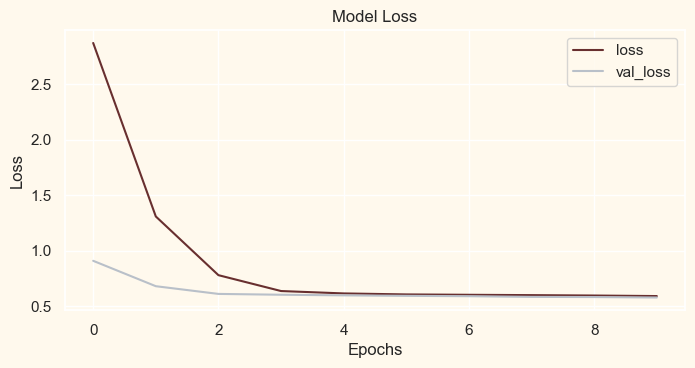

In [423]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc='upper right');

Kod GPT modela overfittinga nema.

In [398]:
clf.evaluate([X_test_in, X_test_mask], y_test_in)

206/206 [==============================] - 266s 1s/step - loss: 0.5756 - accuracy: 0.7074


[0.575598955154419, 0.7073950171470642]

In [399]:
clf.training = False
y_pred = clf.predict([X_test_in, X_test_mask])

206/206 [==============================] - 264s 1s/step


In [400]:
df_test_reduced['gpt_pred'] = y_pred

In [401]:
df_test_reduced["usefulCount_normalized"] = scaler.fit_transform(df_test_reduced[["usefulCount"]])

In [402]:
df_test_reduced['total_pred'] = (df_test_reduced['deep_pred'] + df_test_reduced['lr_pred'] + df_test_reduced['Positiv_ratio'] + df_test_reduced['gpt_pred'])*df_test_reduced['usefulCount_normalized']

In [417]:
y_pred_out = tf.round(y_pred)
y_pred_out

<tf.Tensor: shape=(6572, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [418]:
y_test_in

<tf.Tensor: shape=(6572,), dtype=int32, numpy=array([0, 1, 1, ..., 1, 0, 1])>

In [419]:
from sklearn.metrics import classification_report
print(classification_report(y_test_in, y_pred_out))

              precision    recall  f1-score   support

           0       0.62      0.11      0.18      2005
           1       0.71      0.97      0.82      4567

    accuracy                           0.71      6572
   macro avg       0.67      0.54      0.50      6572
weighted avg       0.68      0.71      0.63      6572



In [420]:
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test_in, y_pred_out))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

Predicted 0  Predicted 1
Actual 0          214         1791
Actual 1          132         4435

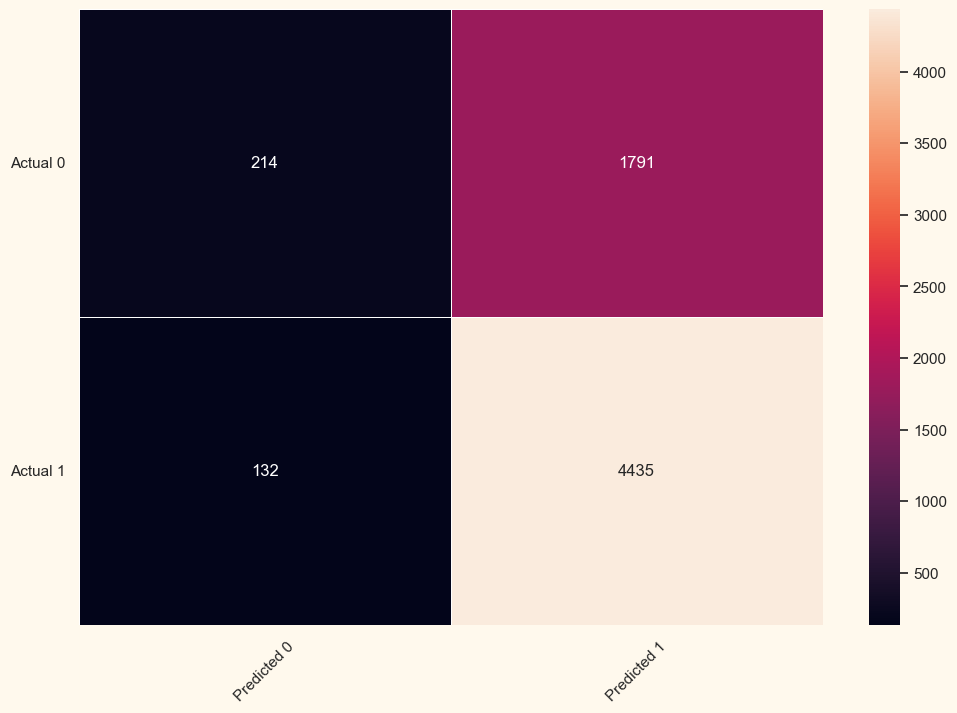

In [421]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">REZULTAT 2</p>

In [430]:
df_test_reduced_result = df_test_reduced.groupby(['condition','drugName']).agg({'total_pred' : ['mean']})
df_test_reduced_result

total_pred
                                                  mean
condition   drugName                                  
ADHD        Amphetamine / dextroamphetamine   0.079540
            Bupropion                         0.191704
            Lisdexamfetamine                  0.099621
            Methylphenidate                   0.077700
            Vyvanse                           0.099609
...                                                ...
ibromyalgia Topiramate                        0.263584
            Tramadol                          0.153658
            Trazodone                         0.072004
            Venlafaxine                       0.176433
zen Shoulde Diclofenac                        0.024130

[510 rows x 1 columns]

In [446]:
# Group by 'condition' and 'drugName' and calculate the mean
df_test_reduced_result = df_test_reduced.groupby(['condition', 'drugName']).agg({'total_pred': 'mean'})

# Sort by mean within each group
df_test_reduced_result = df_test_reduced_result.groupby('condition', group_keys=False).apply(lambda x: x.sort_values('total_pred', ascending=False))

df_test_reduced_result

total_pred
condition   drugName                                   
ADHD        Bupropion                          0.191704
            Lisdexamfetamine                   0.099621
            Vyvanse                            0.099609
            Amphetamine / dextroamphetamine    0.079540
            Methylphenidate                    0.077700
...                                                 ...
ibromyalgia Amitriptyline                      0.066943
            Desvenlafaxine                     0.065319
            Lexapro                            0.041722
            Pristiq                            0.035051
zen Shoulde Diclofenac                         0.024130

[510 rows x 1 columns]

In [447]:
best_drugs_per_condition = df_test_reduced_result.groupby('condition').head(1)

In [448]:
best_drugs_per_condition

total_pred
condition                 drugName                                   
ADHD                      Bupropion                          0.191704
Abnormal Uterine Bleeding Norethindrone                      0.054792
Acne                      Isotretinoin                       0.091938
Agitated State            Aripiprazole                       0.117832
Alcohol Withdrawal        Gabapentin                         0.258613
...                                                               ...
Vulvodynia                Gabapentin                         0.108036
Weight Loss               Adipex-P                           0.221142
atigue                    Amphetamine / dextroamphetamine    0.031428
ibromyalgia               Topiramate                         0.263584
zen Shoulde               Diclofenac                         0.024130

[113 rows x 1 columns]

In [462]:
conditions, drugs = zip(*best_drugs_per_condition.index)

In [484]:
ten_conditions = conditions[:10]
ten_drugs = drugs[:10]
ten_best_values = best_drugs_per_condition['total_pred'].head(10)

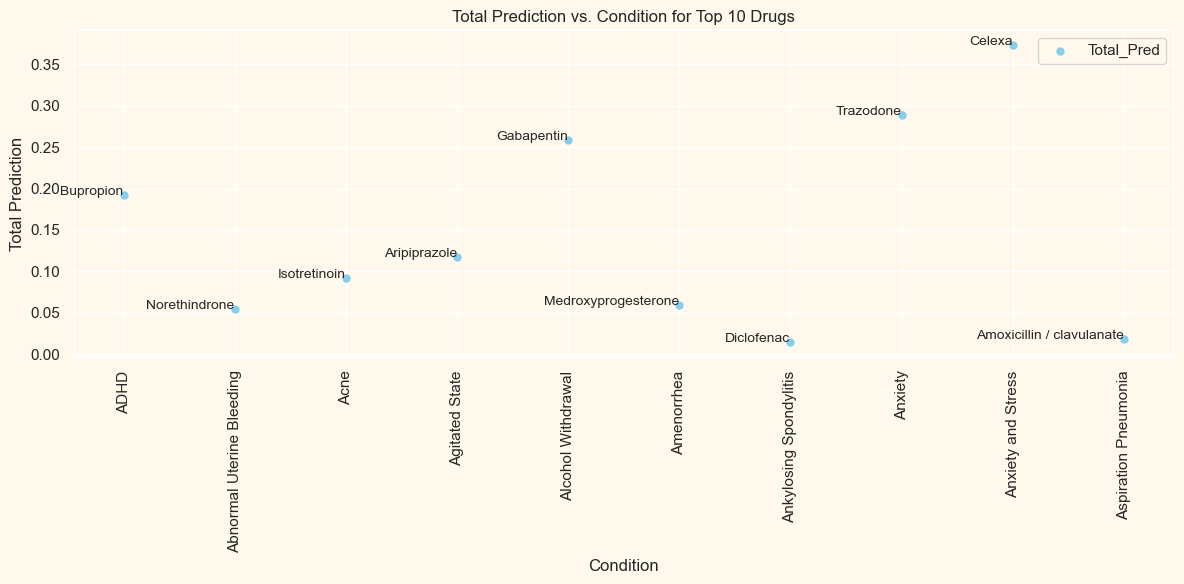

In [488]:
data = pd.DataFrame({'Condition': ten_conditions, 'Drug': ten_drugs, 'Total_Pred': ten_best_values})

# Kreiranje tačkastog grafikona
plt.figure(figsize=(12, 6))
plt.scatter(data['Condition'], data['Total_Pred'], s=100, c='skyblue', marker='.', label='Total_Pred')
plt.xlabel('Condition')
plt.ylabel('Total Prediction')
plt.title('Total Prediction vs. Condition for Top 10 Drugs')
plt.xticks(rotation=90)
plt.legend()

# Dodavanje imena lekova pored tačaka
for i, txt in enumerate(data['Drug']):
    plt.annotate(txt, (data['Condition'].iloc[i], data['Total_Pred'].iloc[i]), fontsize=10, ha='right')

plt.tight_layout()

# Prikazivanje grafikona
plt.show()